In [1]:
# Import libraries

import pandas as pd
import scipy
import scipy.stats as stats
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
# Ensures the files can be read from the downloaded GitHub repository immediately after download
import pathlib
import os

# Suggested by https://fda.readthedocs.io/en/latest/auto_examples/plot_kernel_smoothing.html
# To install package, use "pip install scikit-fda"
# import skfda
# import skfda.preprocessing.smoothing.kernel_smoothers as ks
# from skfda import FDataGrid

# Also make sure to install openpyxl and xlrd to assist in reading data from spreadsheets

In [2]:
# Set color palette
colors = np.array(['black', '#007C92', '#C74632', '#D1660F', '#7F7776', 'midnightblue', '#734675'])

# Set figure font
plt.rcParams['font.family'] = 'sans-serif'

# Set default font size
plt.rcParams['font.size'] = 11

# Set today's date (sometimes versioned with letters at the end)
todaydate = '20250812'

In [3]:
# Read in and average CDFs

# Name base directory
base_dir = os.getcwd()

def readAndAverageCDFs (filename_stub):
    cdf_1 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_1.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_2 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_2.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_3 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_3.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_4 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_4.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_5 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_5.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_6 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_6.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_7 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_7.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_8 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_8.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_9 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_9.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_10 = pd.read_csv(pathlib.PurePath(base_dir, 'CDF_data', filename_stub + '_10.csv'), low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_final = (cdf_1 + cdf_2 + cdf_3 + cdf_4 + cdf_5 + cdf_6 + cdf_7 + cdf_8 + cdf_9 + cdf_10)/10
    return cdf_final

In [4]:
# Kairos Permian
kairosPermian = readAndAverageCDFs('Kairos PermianPermian basin_production_20250809c') # Kairos PermianPermian basin_production_20230824
kairosPermianMidstream = readAndAverageCDFs('Kairos PermianPermian basin_midstream_20250809c') # Kairos PermianPermian basin_midstream_20230824

# CM Permian 2019
CMPermian2019 = readAndAverageCDFs('P - Permian_2019Permian basin_production_20250809c') # P - Permian_2019Permian basin_production_20230824
CMPermian2019Midstream = readAndAverageCDFs('P - Permian_2019Permian basin_midstream_20250809c') # P - Permian_2019Permian basin_midstream_20230824

# CM Permian 2020
CMPermian2020 = readAndAverageCDFs('F - GAO_2020Permian basin_production_20250809c') # F - GAO_2020Permian basin_production_20230824
CMPermian2020Midstream = readAndAverageCDFs('F - GAO_2020Permian basin_midstream_20250809c') # F - GAO_2020Permian basin_midstream_20230824

# CM Permian summer 2021
CMPermian2021Summer = readAndAverageCDFs('E - Permian_2021Permian basin_production_20250809c') # E - Permian_2021Permian basin_production_20230824
CMPermian2021SummerMidstream = readAndAverageCDFs('E - Permian_2021Permian basin_midstream_20250809c') # E - Permian_2021Permian basin_midstream_20230824

# CM Permian Fall 2021
CMPermian2021Fall = readAndAverageCDFs('J - Permian Fall 2021Permian basin_production_20250809c') # J - Permian Fall 2021Permian basin_production_20230824
CMPermian2021FallMidstream = readAndAverageCDFs('J - Permian Fall 2021Permian basin_midstream_20250809c') # J - Permian Fall 2021Permian basin_midstream_20230824

# San Joaquin CM 2016
CMCA2016 = readAndAverageCDFs('CA 2016San Joaquin basin_production_20250809c') # CA 2016San Joaquin basin_production_20230824
CMCA2016Midstream = readAndAverageCDFs('CA 2016San Joaquin basin_midstream_20250809c') # CA 2016San Joaquin basin_midstream_20230824

# San Joaquin 2017
CMCA2017 = readAndAverageCDFs('CA 2017San Joaquin basin_production_20250809c') # CA 2017San Joaquin basin_production_20230824
CMCA2017Midstream = readAndAverageCDFs('CA 2017San Joaquin basin_midstream_20250809c') # CA 2017San Joaquin basin_midstream_20230824

# San Joaquin CM 2020 COVID
CMCA2020COVID = readAndAverageCDFs('H - COVID_CA_2020San Joaquin basin_production_20250809c') # H - COVID_CA_2020San Joaquin basin_production_20230824
CMCA2020COVIDMidstream = readAndAverageCDFs('H - COVID_CA_2020San Joaquin basin_midstream_20250809c') # H - COVID_CA_2020San Joaquin basin_midstream_20230824

# San Joaquin CM 2020
CMCA2020 = readAndAverageCDFs('G - CA_2020San Joaquin basin_production_20250809c') # G - CA_2020San Joaquin basin_production_20230824
CMCA2020Midstream = readAndAverageCDFs('G - CA_2020San Joaquin basin_midstream_20250809c') # G - CA_2020San Joaquin basin_midstream_20230824

# San Joaquin CM 2021
CMCA2021 = readAndAverageCDFs('K - CA Fall 2021San Joaquin basin_production_20250809c') # K - CA Fall 2021San Joaquin basin_production_20230824
CMCA2021Midstream = readAndAverageCDFs('K - CA Fall 2021San Joaquin basin_midstream_20250809c') # K - CA Fall 2021San Joaquin basin_midstream_20230824

# DJ Summer 2021
CMDJ2021Summer = readAndAverageCDFs('A - DJ_Summer_2021Denver basin_production_20250809c') # A - DJ_Summer_2021Denver basin_production_20230824
CMDJ2021SummerMidstream = readAndAverageCDFs('A - DJ_Summer_2021Denver basin_midstream_20250809c') # A - DJ_Summer_2021Denver basin_midstream_20230824

# DJ Fall 2021
CMDJ2021Fall = readAndAverageCDFs('I - DJ Fall 2021Denver basin_production_20250809c') # I - DJ Fall 2021Denver basin_production_20230824
CMDJ2021FallMidstream = readAndAverageCDFs('I - DJ Fall 2021Denver basin_midstream_20250809c') # I - DJ Fall 2021Denver basin_midstream_20230824

# Appalachia 2021
CMAppalachia2021 = readAndAverageCDFs('B - NorthEast_2021Appalachian basin (eastern overthrust area)_production_20250809c') # B - NorthEast_2021Appalachian basin (eastern overthrust area)_production_20230824
CMAppalachia2021Midstream = readAndAverageCDFs('B - NorthEast_2021Appalachian basin (eastern overthrust area)_midstream_20250809c') # B - NorthEast_2021Appalachian basin (eastern overthrust area)_midstream_20230824

# Uinta 2020
CMUinta2020 = readAndAverageCDFs('F - GAO_2020Uinta basin_production_20250809c') # F - GAO_2020Uinta basin_production_20230824
CMUinta2020Midstream = readAndAverageCDFs('F - GAO_2020Uinta basin_midstream_20250809c') # F - GAO_2020Uinta basin_midstream_20230824

# Kairos Fort Worth
KairosBarnett = readAndAverageCDFs('Kairos BarnettFort Worth basin_production_20250809c') # Kairos BarnettFort Worth basin_production_20230824
KairosBarnettMidstream = readAndAverageCDFs('Kairos BarnettFort Worth basin_midstream_20250809c') # Kairos BarnettFort Worth basin_midstream_20230824

# Overall survey summary stats
surveyStats = pd.read_excel(pathlib.PurePath(base_dir, 'Other input data', 'Key sim results correction 20250812.xlsx'), sheet_name="By site (correction)", engine = 'openpyxl' ) # Key sim results 20230824.xlsx
surveyStats = surveyStats.set_index("Scenario")
surveyStatsByVisit = pd.read_excel(pathlib.PurePath(base_dir, 'Other input data', 'Key sim results correction 20250812.xlsx'), sheet_name="By site visit (correction)", engine = 'openpyxl' ) # Key sim results 20230824.xlsx
surveyStatsByVisit = surveyStatsByVisit.set_index("Scenario")
surveyStatsNoStrat = pd.read_excel(pathlib.PurePath(base_dir, 'Other input data', 'Key sim results correction 20250812.xlsx'), sheet_name="By site no strat (correction)", engine = 'openpyxl' ) # Key sim results 20230824.xlsx
surveyStatsNoStrat = surveyStatsNoStrat.set_index("Scenario")

In [5]:
# kairosPermian.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].head()
kairosPermian.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 Kairos Permian production emissions.csv'), index=False)

In [6]:
# Save aggregated production distributions
# Kairos Permian
kairosPermian.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 Kairos Permian production emissions.csv'), index=False)
# CM Permian 2019
CMPermian2019.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM Permian 2019 production emissions.csv'), index=False)
# CM Permian 2020
CMPermian2020.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM Permian 2020 production emissions.csv'), index=False)
# CM Permian summer 2021
CMPermian2021Summer.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM Permian summer 2021 production emissions.csv'), index=False)
# CM Permian Fall 2021
CMPermian2021Fall.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM Permian fall 2021 production emissions.csv'), index=False)
# San Joaquin CM 2016
CMCA2016.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM San Joaquin 2016 production emissions.csv'), index=False)
# San Joaquin 2017
CMCA2017.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM San Joaquin 2017 production emissions.csv'), index=False)
# San Joaquin CM summer 2020
CMCA2020COVID.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM San Joaquin summer 2020 production emissions.csv'), index=False)
# San Joaquin CM 2020
CMCA2020.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM San Joaquin fall 2020 production emissions.csv'), index=False)
# San Joaquin CM 2021
CMCA2021.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM San Joaquin 2021 production emissions.csv'), index=False)
# DJ Summer 2021
CMDJ2021Summer.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM Denver Julesburg summer 2021 production emissions.csv'), index=False)
# DJ Fall 2021
CMDJ2021Fall.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM Denver Julesburg fall 2021 production emissions.csv'), index=False)
# Appalachia 2021
CMAppalachia2021.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM Pennsylvania 2021 production emissions.csv'), index=False)
# Uinta 2020
CMUinta2020.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 CM Uinta 2021 production emissions.csv'), index=False)
# Kairos Fort Worth
KairosBarnett.loc[:, ['Emission magnitude [kgh]', 'Cumulative emissions fraction [%]', 'Cumulative emissions [kgh]']].to_csv(pathlib.PurePath(base_dir, 'CDF_data', 'Aggregated CDFs', 'Figure 3 Kairos Fort Worth 2021 production emissions.csv'), index=False)

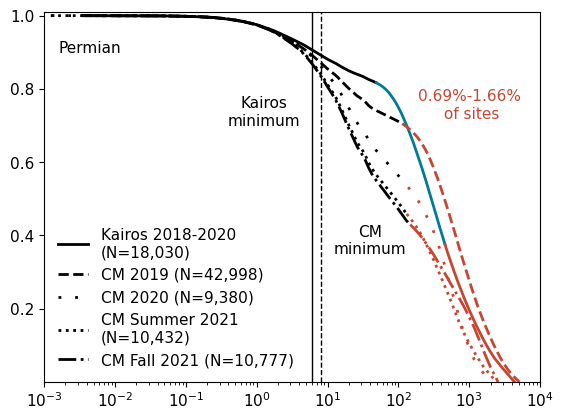

In [7]:
# Cumulative emissions Permian

ax = plt.gca()
# Main plot
KairosFullDetectPermian = np.max(kairosPermian.loc[kairosPermian['Cumulative partial emissions [kgh]'] > 0, 'Emission magnitude [kgh]'])
plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= surveyStats.loc['Kairos_Permian', 'Transition point'], 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= surveyStats.loc['Kairos_Permian', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_2019', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_2019', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='dashed')
plt.semilogx(CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_2020', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_summer2021', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_summer2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='dotted')
plt.semilogx(CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='dashdot')
plt.semilogx(kairosPermian.loc[(kairosPermian['Emission magnitude [kgh]'] >= surveyStats.loc['Kairos_Permian', 'Transition point']) & (kairosPermian['Emission magnitude [kgh]'] <= KairosFullDetectPermian), 'Emission magnitude [kgh]'], kairosPermian.loc[(kairosPermian['Emission magnitude [kgh]'] >= surveyStats.loc['Kairos_Permian', 'Transition point']) & (kairosPermian['Emission magnitude [kgh]'] <= KairosFullDetectPermian), 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= KairosFullDetectPermian, 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= KairosFullDetectPermian, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_2019', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_2019', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_2020', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_summer2021', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_summer2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dotted')
plt.semilogx(CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashdot')

# Min detected
min_detect_CM_Permian = [surveyStats.loc['Permian_2019', 'Min detected emission'],
                         surveyStats.loc['Permian_2020', 'Min detected emission'],
                         surveyStats.loc['Permian_fall2021', 'Min detected emission'],
                         surveyStats.loc['Permian_summer2021', 'Min detected emission']]

plt.axvline(surveyStats.loc['Kairos_Permian', 'Min detected emission'], color=colors[0], linestyle="-", lw=1, label="Kairos min detected")
plt.axvline(np.min(min_detect_CM_Permian), color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.6, 0.35, 'CM\nminimum', color='black', rotation=0, ha='center') # size=14,
plt.text(10**0.1, 0.7, 'Kairos\nminimum', color='black', rotation=0, ha='center') # size=14,


# Fraction sites emitting
fraction_sites_emitting_by_survey_Permian = [surveyStats.loc['Kairos_Permian', 'Avg % sites emitting'],
                                     surveyStats.loc['Permian_2019', 'Avg % sites emitting'],
                                     surveyStats.loc['Permian_2020', 'Avg % sites emitting'],
                                     surveyStats.loc['Permian_fall2021', 'Avg % sites emitting'],
                                     surveyStats.loc['Permian_summer2021', 'Avg % sites emitting']]

plt.text(10**3, 0.72, str("{:.2%}".format(np.min(fraction_sites_emitting_by_survey_Permian)))
         + '-' + "{:.2%}".format(np.max(fraction_sites_emitting_by_survey_Permian)) + '\n of sites', color=colors[2], rotation=0, ha='center') # size=14,

plt.legend(['Kairos 2018-2020 \n(N=' + '{:,.0f}'.format(surveyStats.loc['Kairos_Permian', 'Well sites covered']) + ')',
            'CM 2019 (N=' + '{:,.0f}'.format(surveyStats.loc['Permian_2019', 'Well sites covered']) + ')',
            'CM 2020 (N=' + '{:,.0f}'.format(surveyStats.loc['Permian_2020', 'Well sites covered']) + ')',
            'CM Summer 2021 \n(N=' + '{:,.0f}'.format(surveyStats.loc['Permian_summer2021', 'Well sites covered']) + ')',
            'CM Fall 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Permian_fall2021', 'Well sites covered']) + ')'],
           loc='lower left', frameon=False) # , fontsize=12
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.text(10**-2.8, 0.9, 'Permian', color='black', rotation=0, ha='left') #
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = 6,4

plt.savefig(pathlib.PurePath(base_dir,'Figures','Permian distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures','Permian distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.savefig('Figures/Permian distribution Kairos only 20230328.pdf', format='pdf', bbox_inches="tight")
# plt.show()


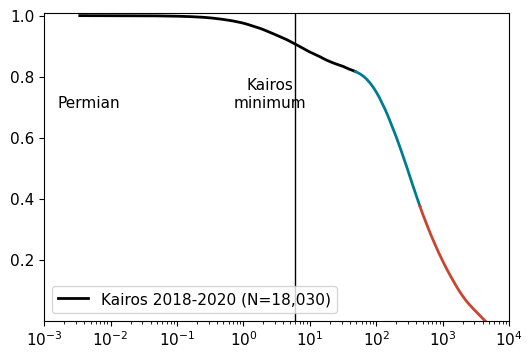

In [11]:
# Cumulative emissions just Kairos Permian

ax = plt.gca()
# Main plot
KairosFullDetectPermian = np.max(kairosPermian.loc[kairosPermian['Cumulative partial emissions [kgh]'] > 0, 'Emission magnitude [kgh]'])
plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= surveyStats.loc['Kairos_Permian', 'Transition point'], 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= surveyStats.loc['Kairos_Permian', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')

plt.semilogx(kairosPermian.loc[(kairosPermian['Emission magnitude [kgh]'] >= surveyStats.loc['Kairos_Permian', 'Transition point']) & (kairosPermian['Emission magnitude [kgh]'] <= KairosFullDetectPermian), 'Emission magnitude [kgh]'], kairosPermian.loc[(kairosPermian['Emission magnitude [kgh]'] >= surveyStats.loc['Kairos_Permian', 'Transition point']) & (kairosPermian['Emission magnitude [kgh]'] <= KairosFullDetectPermian), 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= KairosFullDetectPermian, 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= KairosFullDetectPermian, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='solid')


# Min detected
min_detect_CM_Permian = [surveyStats.loc['Permian_2019', 'Min detected emission'],
                         surveyStats.loc['Permian_2020', 'Min detected emission'],
                         surveyStats.loc['Permian_fall2021', 'Min detected emission'],
                         surveyStats.loc['Permian_summer2021', 'Min detected emission']]

plt.axvline(surveyStats.loc['Kairos_Permian', 'Min detected emission'], color=colors[0], linestyle="-", lw=1, label="Kairos min detected")
plt.text(10**0.4, 0.7, 'Kairos\nminimum', color='black', rotation=0, ha='center') # , size=14


plt.legend(['Kairos 2018-2020 (N=' + '{:,.0f}'.format(surveyStats.loc['Kairos_Permian', 'Well sites covered']) + ')'],
           loc='lower left') # , fontsize=12
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.text(10**-2.8, 0.7, 'Permian', color='black', rotation=0, ha='left') # , fontsize=24
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = 6,4

# plt.savefig('Figures/Permian distribution 20230824.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Figures/Permian distribution Kairos only 20230328.pdf', format='pdf', bbox_inches="tight")
plt.show()


In [8]:
# Aerially detectable fraction of emissions from the Kairos Permian campaign
Kairos_permian_interp = scipy.interpolate.interp1d(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction [%]'])
Kairos_permian_interp(surveyStats.loc['Kairos_Permian', 'Min detected emission'])

array(0.90750021)

In [9]:
# Aerially detectable fraction of simulated emissions from the Kairos Permian campaign
Kairos_permian_sim_interp = scipy.interpolate.interp1d(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Cumulative emissions fraction Rutherford [%]'])
Kairos_permian_sim_interp(surveyStats.loc['Kairos_Permian', 'Transition point'])

array(0.02577184)

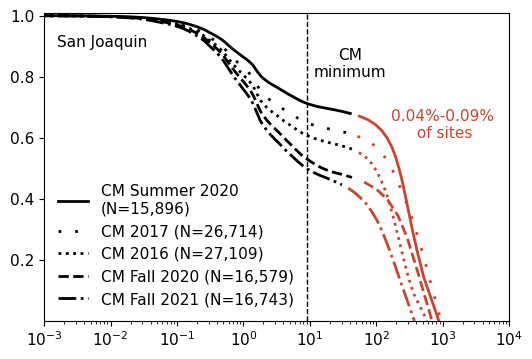

In [10]:
# Cumulative emissions San Joaquin

ax = plt.gca()

# Main plot
plt.semilogx(CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_2017', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_2017', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_2016', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_2016', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="dotted")
plt.semilogx(CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="dashed")
plt.semilogx(CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="dashdot")
plt.semilogx(CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_2017', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_2017', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_2016', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_2016', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="dotted")
plt.semilogx(CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="dashed")
plt.semilogx(CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="dashdot")

# Min detected
min_detect_CM_San_Joaquin = [surveyStats.loc['San_Joaquin_2016', 'Min detected emission'],
                             surveyStats.loc['San_Joaquin_2017', 'Min detected emission'],
                             surveyStats.loc['San_Joaquin_fall2020', 'Min detected emission'],
                             surveyStats.loc['San_Joaquin_summer2020', 'Min detected emission'],
                             surveyStats.loc['San_Joaquin_fall2021', 'Min detected emission']]

plt.axvline(np.min(min_detect_CM_San_Joaquin), color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.6, 0.8, 'CM\nminimum', color='black', rotation=0, ha='center') # , size=14

fraction_sites_emitting_by_survey_San_Joaquin = [surveyStats.loc['San_Joaquin_2016', 'Avg % sites emitting'],
                                     surveyStats.loc['San_Joaquin_2017', 'Avg % sites emitting'],
                                     surveyStats.loc['San_Joaquin_fall2020', 'Avg % sites emitting'],
                                     surveyStats.loc['San_Joaquin_summer2020', 'Avg % sites emitting'],
                                     surveyStats.loc['San_Joaquin_fall2021', 'Avg % sites emitting']]

plt.text(10**3, 0.6, str("{:.2%}".format(np.min(fraction_sites_emitting_by_survey_San_Joaquin)))
         + '-' + "{:.2%}".format(np.max(fraction_sites_emitting_by_survey_San_Joaquin)) + '\n of sites', color=colors[2], rotation=0, ha='center') # , size=14

ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.legend(['CM Summer 2020 \n(N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_summer2020', 'Well sites covered']) + ')',
            'CM 2017 (N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_2017', 'Well sites covered']) + ')',
            'CM 2016 (N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_2016', 'Well sites covered']) + ')',
            'CM Fall 2020 (N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_fall2020', 'Well sites covered']) + ')',
            'CM Fall 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_fall2021', 'Well sites covered']) + ')'],
            loc='lower left', frameon=False) # , fontsize=12

plt.text(10**-2.8, 0.9, 'San Joaquin', color='black', rotation=0, ha='left') # , fontsize=24
plt.rcParams["figure.figsize"] = 6,4

plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
plt.show()
#

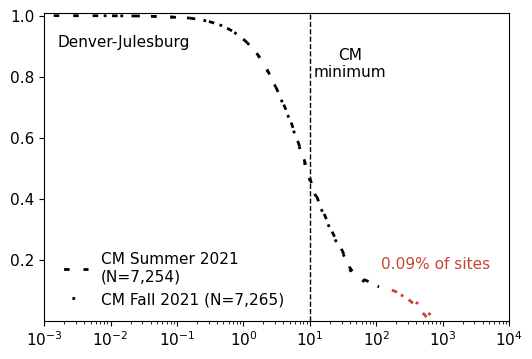

In [11]:
# Cumulative emissions DJ

ax = plt.gca()

# Main plot
plt.semilogx(CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] <= surveyStats.loc['Denver_summer2021', 'Transition point'], 'Emission magnitude [kgh]'], CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] <= surveyStats.loc['Denver_summer2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] <= surveyStats.loc['Denver_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] <= surveyStats.loc['Denver_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(1, (1, 5)))
plt.semilogx(CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] >= surveyStats.loc['Denver_summer2021', 'Transition point'], 'Emission magnitude [kgh]'], CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] >= surveyStats.loc['Denver_summer2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] >= surveyStats.loc['Denver_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] >= surveyStats.loc['Denver_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(1, (1, 5)))

# Min detected
min_detect_CM_DJ = [surveyStats.loc['Denver_summer2021', 'Min detected emission'],
                             surveyStats.loc['Denver_fall2021', 'Min detected emission']]

plt.axvline(np.min(min_detect_CM_DJ), color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.6, 0.8, 'CM\nminimum', color='black', rotation=0, ha='center') # , size=14

fraction_sites_emitting_by_survey_DJ = [surveyStats.loc['Denver_summer2021', 'Avg % sites emitting'],
                                     surveyStats.loc['Denver_fall2021', 'Avg % sites emitting']]

plt.text(10**2.9, 0.17, str("{:.2%}".format(np.min(fraction_sites_emitting_by_survey_DJ))) + ' of sites', color=colors[2], rotation=0, ha='center') # , size=14

ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.legend(['CM Summer 2021 \n(N=' + '{:,.0f}'.format(surveyStats.loc['Denver_summer2021', 'Well sites covered']) + ')',
           'CM Fall 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Denver_fall2021', 'Well sites covered']) + ')'],
           loc='lower left', frameon=False) # , fontsize=12
plt.text(10**-2.8, 0.9, 'Denver-Julesburg', color='black', rotation=0, ha='left') # , fontsize=24
plt.rcParams["figure.figsize"] = 6,4
plt.savefig(pathlib.PurePath(base_dir,'Figures/DJ distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/DJ distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

In [12]:
# Aerially detectable fraction of emissions from the Denver-Julesburg spring 2021 campaign
DJS21_permian_interp = scipy.interpolate.interp1d(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction [%]'])
DJS21_permian_interp(surveyStats.loc['Denver_summer2021', 'Min detected emission']) #, \

array(0.43918964)

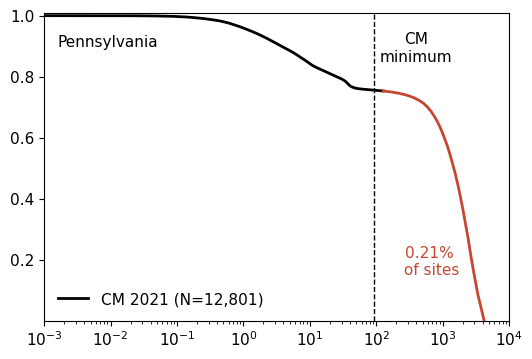

In [13]:
# Cumulative emissions Appalachia

ax = plt.gca()

CMAppalachia2021Buffer = 20
plt.semilogx(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] < surveyStats.loc['Pennsylvania_2021', 'Transition point'] + CMAppalachia2021Buffer, 'Emission magnitude [kgh]'], CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] < surveyStats.loc['Pennsylvania_2021', 'Transition point'] + CMAppalachia2021Buffer,'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0])
plt.semilogx(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] >= surveyStats.loc['Pennsylvania_2021', 'Transition point'], 'Emission magnitude [kgh]'], CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] >= surveyStats.loc['Pennsylvania_2021', 'Transition point'],'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2])

# Min detected
plt.axvline(surveyStats.loc['Pennsylvania_2021', 'Min detected emission'], color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**2.6, 0.85, 'CM\nminimum', color='black', rotation=0, ha='center') # , size=14

# Fraction sites emitting
plt.text(10**2.8, 0.15, str("{:.2%}".format(surveyStats.loc['Pennsylvania_2021', 'Avg % sites emitting'])) + '\n of sites', color=colors[2], rotation=0, ha='center') # , size=14

ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.legend(['CM 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Pennsylvania_2021', 'Well sites covered']) + ')'],
           loc='lower left', frameon=False) # , fontsize=12
plt.text(10**-2.8, 0.9, 'Pennsylvania', color='black', rotation=0, ha='left') # , fontsize=24
plt.rcParams["figure.figsize"] = 6,4

plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

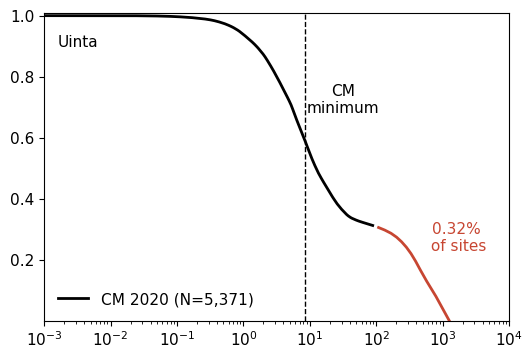

In [14]:
# Cumulative emissions Uinta

ax = plt.gca()

# Main plot
plt.semilogx(CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] <= surveyStats.loc['Uinta_2020', 'Transition point'] + 0.01, 'Emission magnitude [kgh]'], CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] <= surveyStats.loc['Uinta_2020', 'Transition point'] + 0.001, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] >= surveyStats.loc['Uinta_2020', 'Transition point'] - 0.01, 'Emission magnitude [kgh]'], CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] >= surveyStats.loc['Uinta_2020', 'Transition point'] - 0.001, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

plt.text(10**-2.8, 0.9, 'Uinta', color='black', rotation=0, ha='left') # , fontsize=24

# Min detected
plt.axvline(surveyStats.loc['Uinta_2020', 'Min detected emission'], color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.5, 0.681, 'CM\nminimum', color='black', rotation=0, ha='center') # , size=14

# Fraction sites emitting
plt.text(10**3.2, 0.23, str("{:.2%}".format(surveyStats.loc['Uinta_2020', 'Avg % sites emitting'])) + '\n of sites', color=colors[2], rotation=0, ha='center') # size=14,

plt.legend(['CM 2020 (N=' + '{:,.0f}'.format(surveyStats.loc['Uinta_2020', 'Well sites covered']) + ')'],
           loc='lower left', frameon=False) # , fontsize=12
plt.rcParams["figure.figsize"] = 6,4

plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

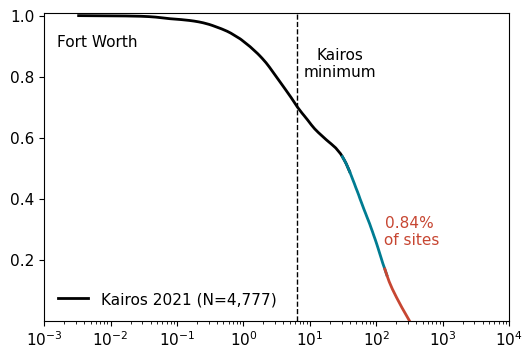

In [15]:
# Cumulative emissions Fort Worth

ax = plt.gca()

# Main plot
KairosBarnettBuffer = 10
KairosFullDetectBarnett = np.max(KairosBarnett.loc[KairosBarnett['Cumulative partial emissions [kgh]'] > 0, 'Emission magnitude [kgh]'])
plt.semilogx(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] <= surveyStats.loc['Fort_Worth_2021', 'Transition point'] + KairosBarnettBuffer, 'Emission magnitude [kgh]'], KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] <= surveyStats.loc['Fort_Worth_2021', 'Transition point'] + KairosBarnettBuffer, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(KairosBarnett.loc[(KairosBarnett['Emission magnitude [kgh]'] >= surveyStats.loc['Fort_Worth_2021', 'Transition point']) & (KairosBarnett['Emission magnitude [kgh]'] <= KairosFullDetectBarnett + KairosBarnettBuffer), 'Emission magnitude [kgh]'], KairosBarnett.loc[(KairosBarnett['Emission magnitude [kgh]'] >= surveyStats.loc['Fort_Worth_2021', 'Transition point']) & (KairosBarnett['Emission magnitude [kgh]'] <= KairosFullDetectBarnett + KairosBarnettBuffer), 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= KairosFullDetectBarnett, 'Emission magnitude [kgh]'], KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= KairosFullDetectBarnett, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

plt.text(10**-2.8, 0.9, 'Fort Worth', color='black', rotation=0, ha='left') # , fontsize=24

# Min detected
plt.axvline(surveyStats.loc['Fort_Worth_2021', 'Min detected emission'], color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.45, 0.8, 'Kairos\nminimum', color='black', rotation=0, ha='center') # , size=14

# Fraction sites emitting
plt.text(10**2.5, 0.25, str("{:.2%}".format(surveyStats.loc['Fort_Worth_2021', 'Avg % sites emitting'])) + '\n of sites', color=colors[2], rotation=0, ha='center') # , size=14

plt.legend(['Kairos 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Fort_Worth_2021', 'Well sites covered']) + ')'],
           loc='lower left', frameon=False) # , fontsize=12
plt.rcParams["figure.figsize"] = 6,4

plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

In [16]:
# Fraction of simulated emissions from the Kairos Fort Worth/Barnett campaign above transition point
Kairos_FW_sim_interp = scipy.interpolate.interp1d(KairosBarnett['Emission magnitude Rutherford [kgh]'], KairosBarnett['Cumulative emissions fraction Rutherford [%]'])
Kairos_FW_sim_interp(surveyStats.loc['Fort_Worth_2021', 'Transition point'])


array(0.04650343)

C:\Users\ESherwin\AppData\Local\Temp\ipykernel_26964\2161714830.py:61: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "Faels". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  patch.set_hatch(hatch)


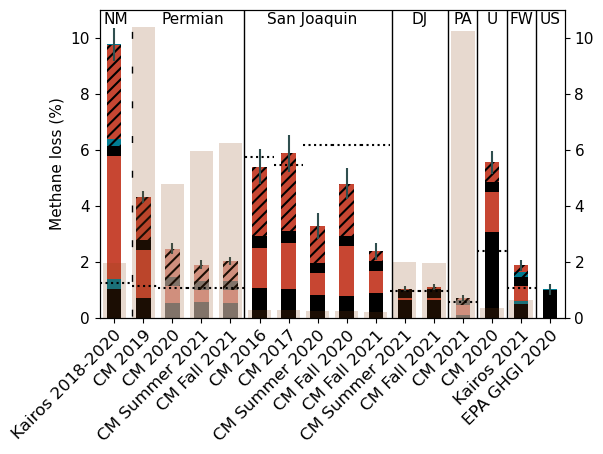

In [17]:
# Fractional loss by campaign assuming Alvarez et al. gas composition

ax = plt.gca()
campaigns_to_include = ["Kairos_Permian", "Permian_2019", "Permian_2020", "Permian_fall2021",
                        "Permian_summer2021", "San_Joaquin_2016", "San_Joaquin_2017", "San_Joaquin_fall2020",
                        "San_Joaquin_summer2020", "San_Joaquin_fall2021", "Denver_summer2021", "Denver_fall2021",
                        "Pennsylvania_2021", "Uinta_2020", "Fort_Worth_2021", "GHGI 2022 (for 2020)"]

comprehensive_campaign = ["Kairos_Permian", "Permian_2019", "San_Joaquin_2016", "San_Joaquin_2017",
                          "San_Joaquin_fall2020", "San_Joaquin_summer2020", "San_Joaquin_fall2021",
                          "Denver_summer2021", "Denver_fall2021", "Uinta_2020", "Fort_Worth_2021", "GHGI 2022 (for 2020)"]
high_productivity_campaign = ["Permian_2020", "Permian_fall2021",
                        "Permian_summer2021", "Pennsylvania_2021"]

surveyStats_to_include = surveyStats.loc[campaigns_to_include]

fractionalLossDF = surveyStats_to_include.loc[:, ["Methane fractional loss simulation prod", "Methane fractional loss partial prod", "Methane fractional loss aerial prod", "FracLossMidGHGI", "FracLossMidPartial", "FracLossMidAerial", 'FracLossP2.5', 'FracLossP97.5']]
fractionalLossDF.loc[:, ["Methane fractional loss simulation prod", "Methane fractional loss partial prod", "Methane fractional loss aerial prod", "FracLossMidGHGI", "FracLossMidPartial", "FracLossMidAerial"]] = 100*fractionalLossDF.loc[:, ["Methane fractional loss simulation prod", "Methane fractional loss partial prod", "Methane fractional loss aerial prod", "FracLossMidGHGI", "FracLossMidPartial", "FracLossMidAerial"]]
fractionalLossDFHP = fractionalLossDF.copy()
fractionalLossDFHP.loc[high_productivity_campaign] = 0

errorbars = np.abs(np.concatenate((np.zeros([7, fractionalLossDF.index.size]), 100*fractionalLossDF[['FracLossP2.5', 'FracLossP97.5']].transpose().to_numpy()), axis=0))
fractionalLossPlot = fractionalLossDF.plot(kind='bar', stacked=True, color=colors[[0,1,2,0,1,2]], yerr=errorbars, error_kw=dict(ecolor='darkslategray'), ax=ax) # error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2)
# plt.yticks(fontsize=14)
plt.ylabel('Methane loss (%)') # , size=16
yupperlim = 11
plt.ylim(0, yupperlim)

# Plot production bars
# Add right-hand axis
ax2 = ax.twinx()
tot_prod_color = 'saddlebrown'
tot_prod_linestyle = 'dashed'
tot_prod_alpha = 0.2
ax2.bar(0, surveyStats.loc['Kairos_Permian', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(1, surveyStats.loc['Permian_2019', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(2, surveyStats.loc['Permian_2020', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(3, surveyStats.loc['Permian_summer2021', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(4, surveyStats.loc['Permian_fall2021', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(5, surveyStats.loc['San_Joaquin_2016', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(6, surveyStats.loc['San_Joaquin_2017', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(7, surveyStats.loc['San_Joaquin_summer2020', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(8, surveyStats.loc['San_Joaquin_fall2020', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(9, surveyStats.loc['San_Joaquin_fall2021', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(10, surveyStats.loc['Denver_summer2021', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(11, surveyStats.loc['Denver_fall2021', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(12, surveyStats.loc['Pennsylvania_2021', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(13, surveyStats.loc['Uinta_2020', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
ax2.bar(14, surveyStats.loc['Fort_Worth_2021', 'Total covered production (t(CH4)/hr)']/1000, color=tot_prod_color, alpha=tot_prod_alpha)
# ax2.bar(15, yupperlim, color=tot_prod_color, alpha=tot_prod_alpha) # For the whole USA
# ax2.set_ylabel('Total production [kt CH$_4$ per h]', color = tot_prod_color, rotation=270) # , size=16
ax2.yaxis.set_label_coords(1.12, 0.5)
ax2.tick_params(axis ='y') # , labelsize=14, labelcolor = tot_prod_color
ax2.set_ylim(0, yupperlim)

# # Set hatches
midstream_hatches = np.array(['///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///'])

hatches =  np.append(np.zeros(fractionalLossDF.shape[0]*3) == 1, midstream_hatches)
for patch, hatch in zip(fractionalLossPlot.patches, hatches):
   patch.set_hatch(hatch)
for patch in np.arange(len(fractionalLossPlot.patches)):
    if (patch % 16 == 2) | (patch % 16 == 3) | (patch % 16 == 4) | (patch % 16 == 12):
        fractionalLossPlot.patches[patch].set_alpha(0.5)

plt.rcParams['hatch.linewidth'] = 1.5 # 1.5
plt.rcParams['hatch.color'] = 'white'

plt.xlabel('')
ax.set_xlabel('')
fractionalLossPlot.set_xticklabels(['Kairos 2018-2020', 'CM 2019', 'CM 2020', 'CM Summer 2021', 'CM Fall 2021', 'CM 2016', 'CM 2017', 'CM Summer 2020', 'CM Fall 2020', 'CM Fall 2021', 'CM Summer 2021', 'CM Fall 2021', 'CM 2021', 'CM 2020', 'Kairos 2021', 'EPA GHGI 2020'], fontsize=12, rotation=45, horizontalalignment='right', rotation_mode='anchor')
letterheight = 10.5
plt.text(0.07, letterheight, 'NM', color='black', rotation=0, ha='center') # -63 , fontsize=14
plt.text(2.7, letterheight, 'Permian', color='black', rotation=0, ha='center') # -63 , fontsize=14
plt.text(6.8, letterheight, 'San Joaquin', color='black', rotation=0, ha='center') # -70, fontsize=14
plt.text(10.5, letterheight, 'DJ', color='black', rotation=0, ha='center') # -64, fontsize=14
plt.text(12, letterheight, 'PA', color='black', rotation=0, ha='center') # -68, fontsize=14
plt.text(13, letterheight, 'U', color='black', rotation=0, ha='center') # -55, fontsize=14
plt.text(14.01, letterheight, 'FW', color='black', rotation=0, ha='center') # -55, fontsize=14
plt.text(15, letterheight, 'US', color='black', rotation=0, ha='center') # -55, fontsize=14
plt.axvline(0.6, ls=(0, (5, 20)), linewidth=1, color='black', ymin=-70) # '--'
plt.axvline(4.45, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(9.55, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(11.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(12.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(13.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(14.5, ls='-', linewidth=1, color='black', ymin=-70)

# Plot GHGI lines
plt.hlines(surveyStats.loc['Kairos_Permian', 'State GHGI']*100,
           -0.5, 0.6, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Permian_2019', 'State GHGI']*100,
           0.6, 1.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Permian_2020', 'State GHGI']*100,
           1.5, 2.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Permian_summer2021', 'State GHGI']*100,
           2.5, 4.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Permian_fall2021', 'State GHGI']*100,
           3.5, 3.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_2016', 'State GHGI']*100,
           4.5, 5.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_2017', 'State GHGI']*100,
           5.5, 6.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_summer2020', 'State GHGI']*100,
           6.5, 7.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_fall2020', 'State GHGI']*100,
           7.5, 8.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_fall2021', 'State GHGI']*100,
           8.5, 9.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Denver_summer2021', 'State GHGI']*100,
           9.5, 10.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Denver_fall2021', 'State GHGI']*100,
           10.5, 11.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc["Pennsylvania_2021", 'State GHGI']*100,
           11.5, 12.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc["Uinta_2020", 'State GHGI']*100,
           12.5, 13.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc["Fort_Worth_2021", 'State GHGI']*100,
           13.5, 14.5, color=colors[0], linestyles='dotted')

fractionalLossPlot.get_legend().remove()
plt.rcParams["figure.figsize"] = 6.5, 4.5 # 5.75,4.5
plt.savefig(pathlib.PurePath(base_dir,'Figures/Loss rates ' + todaydate + '.png'), format='png', bbox_inches="tight", dpi=300)
plt.savefig(pathlib.PurePath(base_dir,'Figures/Loss rates ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

In [18]:
# State-level GHGI estimate for New Mexico, analogous to the Kairos Permian campaign
surveyStats.loc['Kairos_Permian', 'State GHGI']*100

1.24781772796976

Separate production distributions

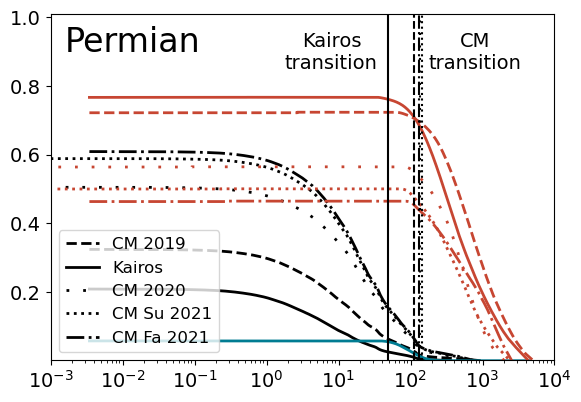

In [19]:
# Cumulative emissions Permian separate distributions

ax = plt.gca()

# Main plot
plt.semilogx(CMPermian2019['Emission magnitude Rutherford [kgh]'], CMPermian2019['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='dashed')
plt.semilogx(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMPermian2020['Emission magnitude Rutherford [kgh]'], CMPermian2020['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer['Emission magnitude Rutherford [kgh]'], CMPermian2021Summer['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='dotted')
plt.semilogx(CMPermian2021Fall['Emission magnitude Rutherford [kgh]'], CMPermian2021Fall['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='dashdot')
plt.semilogx(CMPermian2019['Emission magnitude [kgh]'], CMPermian2019['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction partial [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMPermian2020['Emission magnitude [kgh]'], CMPermian2020['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer['Emission magnitude [kgh]'], CMPermian2021Summer['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='dotted')
plt.semilogx(CMPermian2021Fall['Emission magnitude [kgh]'], CMPermian2021Fall['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='dashdot')

# Transition points
plt.axvline(surveyStats.loc['Kairos_Permian', 'Transition point'], color=colors[0], linestyle="-", lw=1.5, label="Kairos min detected")
plt.axvline(surveyStats.loc['Permian_2019', 'Transition point'], color=colors[0], linestyle='dashed', lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_2020', 'Transition point'], color=colors[0], linestyle=(0, (1, 5)), lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_fall2021', 'Transition point'], color=colors[0], linestyle='dotted', lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_summer2021', 'Transition point'], color=colors[0], linestyle="dashdot", lw=1.5, label="CM min detected")
plt.text(10**2.9, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
plt.text(10**0.9, 0.85, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')

plt.legend(['CM 2019',
            'Kairos',
            'CM 2020',
            'CM Su 2021',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.text(10**-2.8, 0.9, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig(pathlib.PurePath(base_dir,'Figures/Permian distribution separate ' + todaydate + '.png'), format='png',
 bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Permian distribution separate ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()



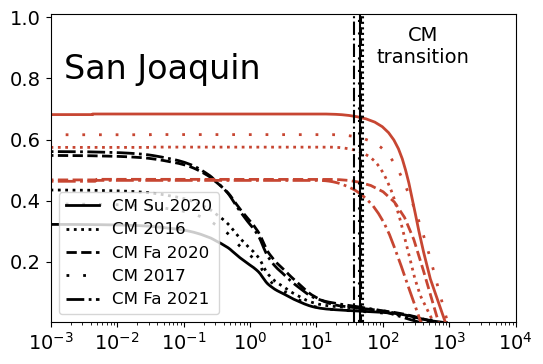

In [20]:
# Cumulative emissions San Joaquin separate distributions

ax = plt.gca()

# Main plot
plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CMCA2020COVID['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMCA2016['Emission magnitude [kgh]'], CMCA2016['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="dotted")
plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CMCA2020['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="dashed")
plt.semilogx(CMCA2017['Emission magnitude [kgh]'], CMCA2017['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CMCA2021['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="dashdot")
plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CMCA2020COVID['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMCA2016['Emission magnitude [kgh]'], CMCA2016['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="dotted")
plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CMCA2020['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="dashed")
plt.semilogx(CMCA2017['Emission magnitude [kgh]'], CMCA2017['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CMCA2021['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="dashdot")

plt.axvline(surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], color=colors[0], linestyle="-", lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_2016', 'Transition point'], color=colors[0], linestyle='dashed', lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], color=colors[0], linestyle=(0, (1, 5)))
plt.axvline(surveyStats.loc['San_Joaquin_2017', 'Transition point'], color=colors[0], linestyle='dotted', lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], color=colors[0], linestyle="dashdot", lw=1.5)
plt.text(10**2.6, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Su 2020',
            'CM 2016',
            'CM Fa 2020',
            'CM 2017',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.8, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin distribution separate ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin distribution separate ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()


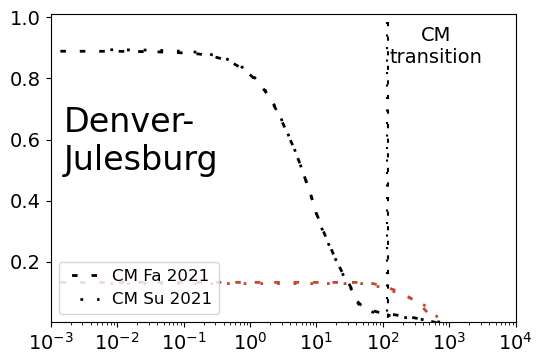

In [21]:
# Cumulative emissions DJ

ax = plt.gca()

# Main plot
plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], CMDJ2021Fall['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(1, (1, 5)))
plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], CMDJ2021Fall['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle=(1, (1, 5)))

plt.axvline(surveyStats.loc['Denver_summer2021', 'Transition point'], color=colors[0], linestyle=(5, (2, 5)), lw=1.5)
plt.axvline(surveyStats.loc['Denver_fall2021', 'Transition point'], color=colors[0], linestyle=(1, (1, 5)), lw=1.5)
plt.text(10**2.8, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fa 2021',
            'CM Su 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.5, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig(pathlib.PurePath(base_dir,'Figures/DJ distribution separate ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/DJ distribution separate ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

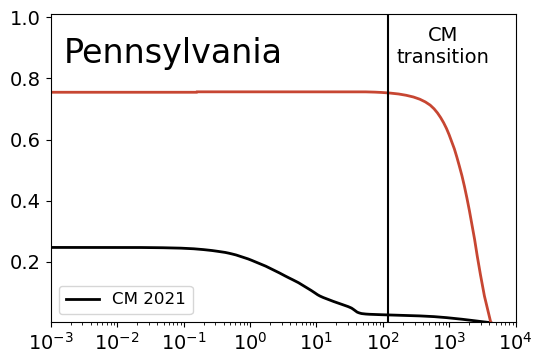

In [22]:
# Cumulative emissions Appalachia

ax = plt.gca()


plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], CMAppalachia2021['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0])
plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], CMAppalachia2021['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2])

plt.axvline(surveyStats.loc['Pennsylvania_2021', 'Transition point'], color=colors[0], linestyle='-', lw=1.5)
plt.text(10**2.9, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.85, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania distribution separate ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania distribution separate ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
plt.show()

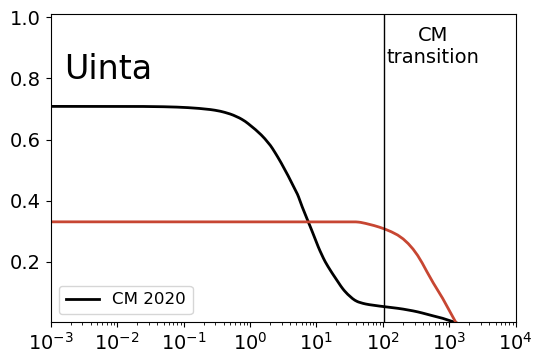

In [23]:
# Cumulative emissions Uinta

ax = plt.gca()

# Main plot
plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="solid")
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

plt.axvline(surveyStats.loc['Uinta_2020', 'Transition point'], color=colors[0], linestyle='-', lw=1)
plt.text(10**2.75, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
plt.legend(['CM 2020'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.8, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
# plt.savefig('Figures/Uinta distribution separate 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta distribution separate ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta distribution separate ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
plt.show()

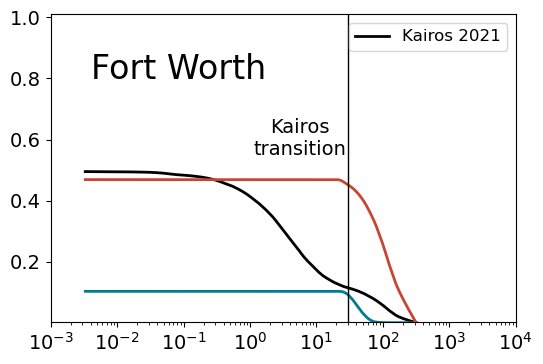

In [24]:
# Cumulative emissions Fort Worth

ax = plt.gca()

# Fraction sites emitting

# Main plot
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], KairosBarnett['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], KairosBarnett['Cumulative emissions fraction partial [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], KairosBarnett['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="solid")
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

plt.axvline(surveyStats.loc['Fort_Worth_2021', 'Transition point'], color=colors[0], linestyle='-', lw=1)
plt.text(10**0.75, 0.55, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')
plt.legend(['Kairos 2021'],
           loc='upper right', fontsize=12)
plt.text(10**-2.4, 0.8, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
# plt.savefig('Figures/Fort Worth distribution separate 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth distribution separate ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth distribution separate ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
plt.show()

Midstream emissions distributions

In [25]:
# Midstream transition point
# Based on Zimmerle et al. 2015
midstream_transition_point = 41.30800181696471 # kg(CH4)/hr, from the Zimmerle_super_emitter_cutoff1 node in the Analytica model

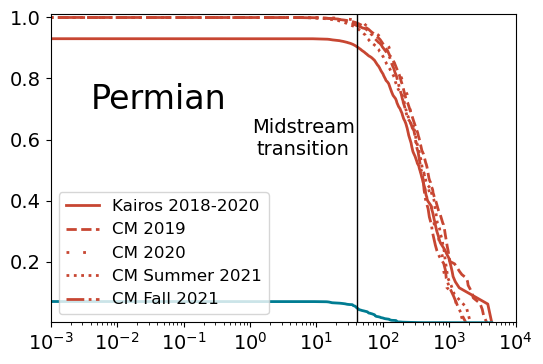

In [26]:
# Cumulative midstream emissions Permian

ax = plt.gca()

# Main plot
plt.semilogx(kairosPermianMidstream['Emission magnitude [kgh]'], kairosPermianMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(CMPermian2019Midstream['Emission magnitude [kgh]'], CMPermian2019Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(CMPermian2020Midstream['Emission magnitude [kgh]'], CMPermian2020Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021SummerMidstream['Emission magnitude [kgh]'], CMPermian2021SummerMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dotted')
plt.semilogx(CMPermian2021FallMidstream['Emission magnitude [kgh]'], CMPermian2021FallMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashdot')
plt.semilogx(kairosPermianMidstream['Emission magnitude [kgh]'], kairosPermianMidstream['Cumulative partial emissions fraction [%]'], linewidth=2, color=colors[1], linestyle="solid")

# Add midstream transition point
plt.axvline(midstream_transition_point, color=colors[0], linestyle='-', lw=1)
plt.text(10**0.8, 0.55, 'Midstream\ntransition', size=14, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 0.7, 'Permian', fontsize=24, color='black', rotation=0, ha='left')

plt.legend(['Kairos 2018-2020',
            'CM 2019',
            'CM 2020',
            'CM Summer 2021',
            'CM Fall 2021'],
           loc='lower left', fontsize=12)# Min detected

plt.rcParams["figure.figsize"] = 6,4
# plt.savefig('Figures/Permian midstream distribution 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Permian midstream distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Permian midstream distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()
#


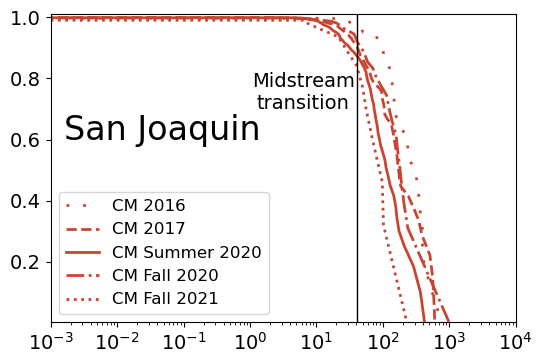

In [27]:
# Cumulative midstream emissions San Joaquin

ax = plt.gca()

# Main plot
plt.semilogx(CMCA2016Midstream['Emission magnitude [kgh]'], CMCA2016Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2017Midstream['Emission magnitude [kgh]'], CMCA2017Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(CMCA2020COVIDMidstream['Emission magnitude [kgh]'], CMCA2020COVIDMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(CMCA2020Midstream['Emission magnitude [kgh]'], CMCA2020Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashdot')
plt.semilogx(CMCA2021Midstream['Emission magnitude [kgh]'], CMCA2021Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dotted')

# Add midstream transition point
plt.axvline(midstream_transition_point, color=colors[0], linestyle='-', lw=1)
plt.text(10**0.8, 0.70, 'Midstream\ntransition', size=14, color='black', rotation=0, ha='center')

ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2016',
            'CM 2017',
            'CM Summer 2020',
            'CM Fall 2020',
            'CM Fall 2021'],
            loc='lower left', fontsize=12) # 'CM 2016-2017 (N=' + '{:,.0f}'.format(CAWellVisits20162017) + ')',

plt.text(10**-2.8, 0.6, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = 6,4
# plt.savefig('Figures/San Joaquin midstream distribution 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin midstream distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin midstream distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()


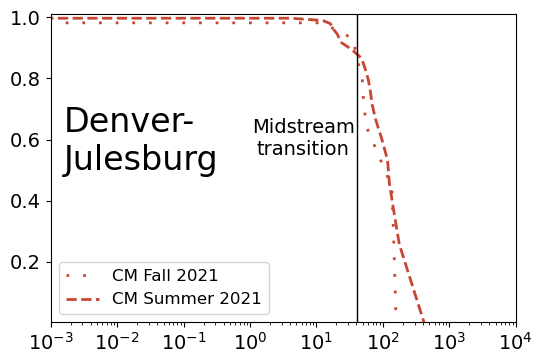

In [28]:
# Cumulative midstream emissions DJ

ax = plt.gca()

# Main plot
plt.semilogx(CMDJ2021SummerMidstream['Emission magnitude [kgh]'], CMDJ2021SummerMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMDJ2021FallMidstream['Emission magnitude [kgh]'], CMDJ2021FallMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashed')

# Add midstream transition point
plt.axvline(midstream_transition_point, color=colors[0], linestyle='-', lw=1)
plt.text(10**0.8, 0.55, 'Midstream\ntransition', size=14, color='black', rotation=0, ha='center')


ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fall 2021',
            'CM Summer 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.5, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = 6,4
# plt.savefig('Figures/DJ midstream distribution 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/DJ midstream distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/DJ midstream distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
# plt.show()

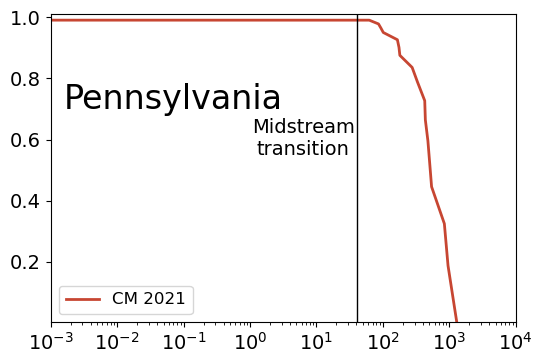

In [29]:
# Cumulative midstream emissions Appalachia

ax = plt.gca()

plt.semilogx(CMAppalachia2021Midstream['Emission magnitude [kgh]'], CMAppalachia2021Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='-')

# Add midstream transition point
plt.axvline(midstream_transition_point, color=colors[0], linestyle='-', lw=1)
plt.text(10**0.8, 0.55, 'Midstream\ntransition', size=14, color='black', rotation=0, ha='center')


ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.7, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = 6,4
# plt.savefig('Figures/Pennsylvania midstream distribution 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania midstream distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania midstream distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

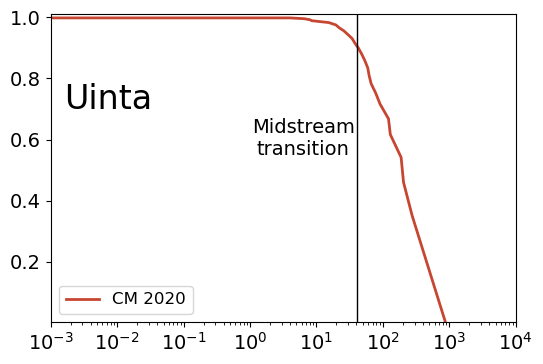

In [30]:
# Cumulative midstream emissions Uinta

ax = plt.gca()

# Main plot
plt.semilogx(CMUinta2020Midstream['Emission magnitude [kgh]'], CMUinta2020Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='-')
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

# Add midstream transition point
plt.axvline(midstream_transition_point, color=colors[0], linestyle='-', lw=1)
plt.text(10**0.8, 0.55, 'Midstream\ntransition', size=14, color='black', rotation=0, ha='center')


plt.text(10**-2.8, 0.7, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

plt.legend(['CM 2020'],
           loc='lower left', fontsize=12)

plt.rcParams["figure.figsize"] = 6,4
# plt.savefig('Figures/Uinta midstream distribution 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta midstream distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta midstream distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
plt.show()

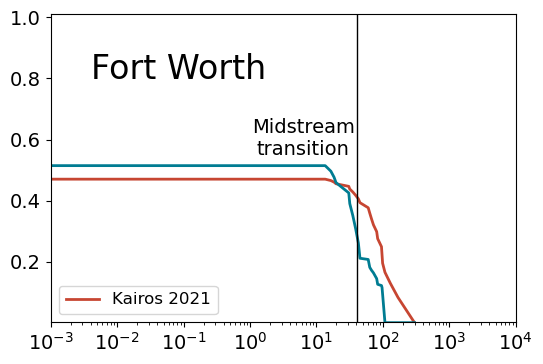

In [32]:
# Cumulative midstream emissions Fort Worth

ax = plt.gca()

# Main plot
plt.semilogx(KairosBarnettMidstream['Emission magnitude [kgh]'], KairosBarnettMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(KairosBarnettMidstream['Emission magnitude [kgh]'], KairosBarnettMidstream['Cumulative partial emissions fraction [%]'], linewidth=2, color=colors[1], linestyle="solid")

# Add midstream transition point
plt.axvline(midstream_transition_point, color=colors[0], linestyle='-', lw=1)
plt.text(10**0.8, 0.55, 'Midstream\ntransition', size=14, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 0.8, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = 6,4
# plt.savefig('Figures/Fort Worth midstream distribution 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth midstream distribution ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth midstream distribution ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

Loglog cumulative emissions distributions

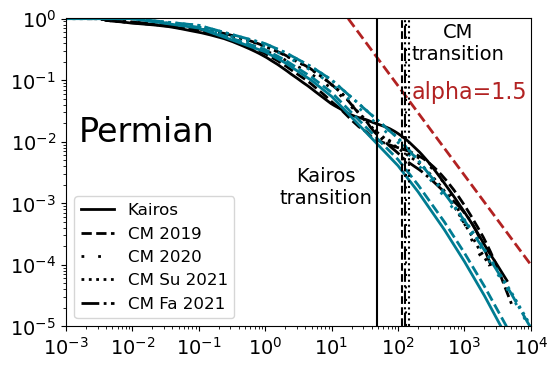

In [33]:
# Cumulative emissions Permian loglog distributions

ax = plt.gca()

# Loglog of full distribution, adds min cumulative fraction to ensure the largest emission isn't set to zero cumulative fraction of sites
plt.loglog(kairosPermian['Emission magnitude [kgh]'], (1 - kairosPermian['Cumulative fraction of sites inc partial detect'] + kairosPermian.loc[0, 'Cumulative fraction of sites']),linewidth=2, color=colors[0], linestyle='solid')
plt.loglog(CMPermian2019['Emission magnitude [kgh]'], 1 - CMPermian2019['Cumulative fraction of sites'] + CMPermian2019.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='dashed')
plt.loglog(CMPermian2020['Emission magnitude [kgh]'], 1 - CMPermian2020['Cumulative fraction of sites'] + CMPermian2020.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.loglog(CMPermian2021Summer['Emission magnitude [kgh]'], 1 - CMPermian2021Summer['Cumulative fraction of sites'] + CMPermian2021Summer.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='dotted')
plt.loglog(CMPermian2021Fall['Emission magnitude [kgh]'], 1 - CMPermian2021Fall['Cumulative fraction of sites'] + CMPermian2021Fall.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='dashdot')

# Lognormal fits
KairosNMLogNormal = scipy.stats.lognorm.fit(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermian2019LogNormal = scipy.stats.lognorm.fit(CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermian2020LogNormal = scipy.stats.lognorm.fit(CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermianS2021LogNormal = scipy.stats.lognorm.fit(CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermianF2021LogNormal = scipy.stats.lognorm.fit(CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfKairosNM = scipy.stats.lognorm.cdf(x=xx, s=KairosNMLogNormal[0], loc=KairosNMLogNormal[1], scale=KairosNMLogNormal[2])
lognormCdfCM2019 = scipy.stats.lognorm.cdf(x=xx, s=CMPermian2019LogNormal[0], loc=CMPermian2019LogNormal[1], scale=CMPermian2019LogNormal[2])
lognormCdfCM2020 = scipy.stats.lognorm.cdf(x=xx, s=CMPermian2020LogNormal[0], loc=CMPermian2020LogNormal[1], scale=CMPermian2020LogNormal[2])
lognormCdfCMS2021 = scipy.stats.lognorm.cdf(x=xx, s=CMPermianS2021LogNormal[0], loc=CMPermianS2021LogNormal[1], scale=CMPermianS2021LogNormal[2])
lognormCdfCMF2021 = scipy.stats.lognorm.cdf(x=xx, s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2])
plt.loglog(xx, 1 - lognormCdfKairosNM, linewidth=2, color=colors[1], linestyle='solid')
plt.loglog(xx, 1 - lognormCdfCM2019, linewidth=2, color=colors[1], linestyle='dashed')
plt.loglog(xx, 1 - lognormCdfCM2020, linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.loglog(xx, 1 - lognormCdfCMS2021, linewidth=2, color=colors[1], linestyle='dotted')
plt.loglog(xx, 1 - lognormCdfCMF2021, linewidth=2, color=colors[1], linestyle='dashdot')

# Power law approximation
plt.loglog([10**1.25, 10**4], [10**0, 10**-4],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-1.3, 'alpha=1.5', fontsize=16, color='firebrick', rotation='horizontal')

# Transition points
plt.axvline(surveyStats.loc['Kairos_Permian', 'Transition point'], color=colors[0], linestyle="-", lw=1.5, label="Kairos min detected")
plt.axvline(surveyStats.loc['Permian_2019', 'Transition point'], color=colors[0], linestyle='dashed', lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_2020', 'Transition point'], color=colors[0], linestyle=(0, (1, 5)), lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_fall2021', 'Transition point'], color=colors[0], linestyle='dotted', lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_summer2021', 'Transition point'], color=colors[0], linestyle="dashdot", lw=1.5, label="CM min detected")
plt.text(10**2.9, 10**-0.67, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
plt.text(10**0.92, 10**-3, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')

plt.legend(['Kairos',
            'CM 2019',
            'CM 2020',
            'CM Su 2021',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.text(10**-2.8, 10**-2, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.rcParams["figure.figsize"] = (6,4)
# plt.savefig('Figures/Permian distribution loglog 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Permian distribution loglog ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Permian distribution loglog ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

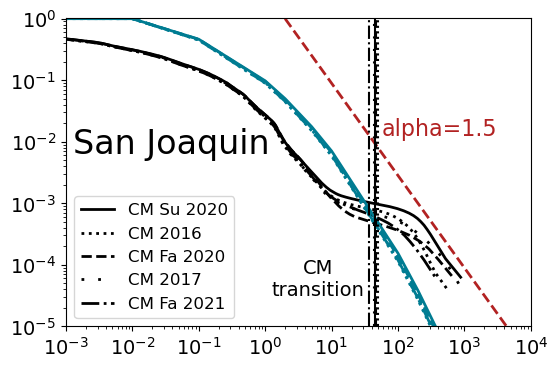

In [34]:
# Cumulative emissions San Joaquin separate distributions

ax = plt.gca()

# Loglog of full distribution, adds min cumulative fraction to ensure the largest emission isn't set to zero cumulative fraction of sites
plt.loglog(CMCA2020COVID['Emission magnitude [kgh]'], 1 - CMCA2020COVID['Cumulative fraction of sites'] + CMCA2020COVID.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='solid')
plt.loglog(CMCA2016['Emission magnitude [kgh]'], 1 - CMCA2016['Cumulative fraction of sites'] + CMCA2016.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="dotted")
plt.loglog(CMCA2020['Emission magnitude [kgh]'], 1 - CMCA2020['Cumulative fraction of sites'] + CMCA2020.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="dashed")
plt.loglog(CMCA2017['Emission magnitude [kgh]'], 1 - CMCA2017['Cumulative fraction of sites'] + CMCA2017.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.loglog(CMCA2021['Emission magnitude [kgh]'], 1 - CMCA2021['Cumulative fraction of sites'] + CMCA2021.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="dashdot")

CA2020COVIDLogNormal = scipy.stats.lognorm.fit(CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2016LogNormal = scipy.stats.lognorm.fit(CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CAF2020LogNormal = scipy.stats.lognorm.fit(CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2017LogNormal = scipy.stats.lognorm.fit(CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2021LogNormal = scipy.stats.lognorm.fit(CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfCACOVID = scipy.stats.lognorm.cdf(x=xx, s=CA2020COVIDLogNormal[0], loc=CA2020COVIDLogNormal[1], scale=CA2020COVIDLogNormal[2])
lognormCdfCA2016 = scipy.stats.lognorm.cdf(x=xx, s=CA2016LogNormal[0], loc=CA2016LogNormal[1], scale=CA2016LogNormal[2])
lognormCdfCAFall = scipy.stats.lognorm.cdf(x=xx, s=CAF2020LogNormal[0], loc=CAF2020LogNormal[1], scale=CAF2020LogNormal[2])
lognormCdfCA2017 = scipy.stats.lognorm.cdf(x=xx, s=CA2017LogNormal[0], loc=CA2017LogNormal[1], scale=CA2017LogNormal[2])
lognormCdfCA2021 = scipy.stats.lognorm.cdf(x=xx, s=CA2021LogNormal[0], loc=CA2021LogNormal[1], scale=CA2021LogNormal[2])
plt.loglog(xx, 1 - lognormCdfCACOVID, linewidth=2, color=colors[1], linestyle='solid')
plt.loglog(xx, 1 - lognormCdfCA2016, linewidth=2, color=colors[1], linestyle="dotted")
plt.loglog(xx, 1 - lognormCdfCAFall, linewidth=2, color=colors[1], linestyle="dashed")
plt.loglog(xx, 1 - lognormCdfCA2017, linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.loglog(xx, 1 - lognormCdfCA2021, linewidth=2, color=colors[1], linestyle="dashdot")


# Power law approximation
plt.loglog([10**0.3, 10**4.3], [10**0, 10**-6],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**1.75, 10**-1.9, 'alpha=1.5', fontsize=16, color='firebrick', rotation='horizontal')


plt.axvline(surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], color=colors[0], linestyle="-", lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_2016', 'Transition point'], color=colors[0], linestyle='dashed', lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], color=colors[0], linestyle=(0, (1, 5)))
plt.axvline(surveyStats.loc['San_Joaquin_2017', 'Transition point'], color=colors[0], linestyle='dotted', lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], color=colors[0], linestyle="dashdot", lw=1.5)
plt.text(10**0.8, 10**-4.5, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')

ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Su 2020',
            'CM 2016',
            'CM Fa 2020',
            'CM 2017',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.9, 10**-2.2, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
# plt.savefig('Figures/San Joaquin distribution loglog 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin distribution loglog ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin distribution loglog ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

In [35]:
CMCA2016['Emission magnitude [kgh]'].describe()

count    27109.000000
mean         0.241325
std          6.028046
min          0.000000
25%          0.000000
50%          0.000631
75%          0.021544
max        582.337027
Name: Emission magnitude [kgh], dtype: float64

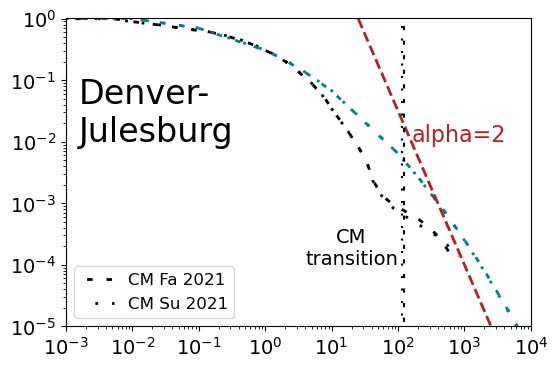

In [36]:
# Cumulative emissions DJ

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMDJ2021Summer['Emission magnitude [kgh]'], 1 - CMDJ2021Summer['Cumulative fraction of sites'] + CMDJ2021Summer.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(5, (2, 5)))
plt.loglog(CMDJ2021Fall['Emission magnitude [kgh]'], 1 - CMDJ2021Fall['Cumulative fraction of sites'] + CMDJ2021Fall.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(1, (1, 5)))

# Lognormal fits
DJSummerLogNormal = scipy.stats.lognorm.fit(CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
DJFallLogNormal = scipy.stats.lognorm.fit(CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfDJSummer = scipy.stats.lognorm.cdf(x=xx, s=DJSummerLogNormal[0], loc=DJSummerLogNormal[1], scale=DJSummerLogNormal[2])
lognormCdfDJFall = scipy.stats.lognorm.cdf(x=xx, s=DJFallLogNormal[0], loc=DJFallLogNormal[1], scale=DJFallLogNormal[2])
plt.loglog(xx, 1 - lognormCdfDJSummer, linewidth=2, color=colors[1], linestyle=(5, (2, 5)))
plt.loglog(xx, 1 - lognormCdfDJFall, linewidth=2, color=colors[1], linestyle=(1, (1, 5)))

# Power law approximation
plt.loglog([10**1.4, 10**3.4], [10**0, 10**-5],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-2, 'alpha=2', fontsize=16, color='firebrick', rotation='horizontal')

plt.axvline(surveyStats.loc['Denver_summer2021', 'Transition point'], color=colors[0], linestyle=(5, (2, 5)), lw=1.5)
plt.axvline(surveyStats.loc['Denver_fall2021', 'Transition point'], color=colors[0], linestyle=(1, (1, 5)), lw=1.5)
plt.text(10**1.3, 10**-4, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fa 2021',
            'CM Su 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 10**-2, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
# plt.savefig('Figures/DJ distribution loglog 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/DJ distribution loglog ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/DJ distribution loglog ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

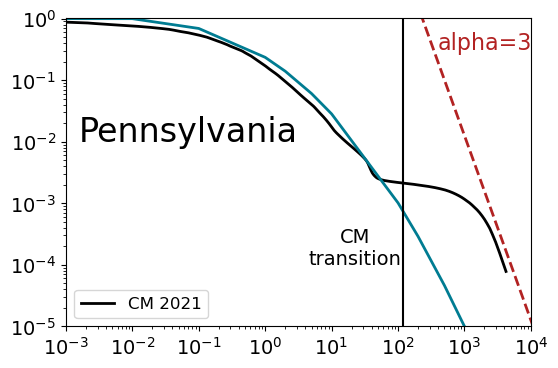

In [37]:
# Cumulative emissions Appalachia

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMAppalachia2021['Emission magnitude [kgh]'], 1 - CMAppalachia2021['Cumulative fraction of sites'] + CMAppalachia2021.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0])

# Lognormal fits
PennsylvaniaLogNormal = scipy.stats.lognorm.fit(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfPA = scipy.stats.lognorm.cdf(x=xx, s=PennsylvaniaLogNormal[0], loc=PennsylvaniaLogNormal[1], scale=PennsylvaniaLogNormal[2])
plt.loglog(xx, 1 - lognormCdfPA, linewidth=2, color=colors[1])

# Power law approximation
plt.loglog([10**1.7, 10**4.7], [10**2, 10**-7],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.6, 10**-0.5, 'alpha=3', fontsize=16, color='firebrick', rotation='horizontal')

plt.axvline(surveyStats.loc['Pennsylvania_2021', 'Transition point'], color=colors[0], linestyle='-', lw=1.5)
plt.text(10**1.35, 10**-4, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 10**-2, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
# plt.savefig('Figures/Pennsylvania distribution loglog 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania distribution loglog ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania distribution loglog ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

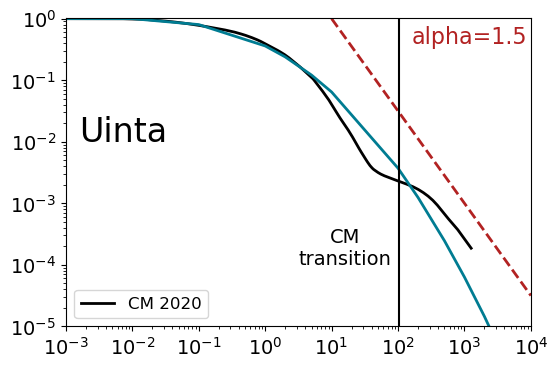

In [38]:
# Cumulative emissions Uinta

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMUinta2020['Emission magnitude [kgh]'], 1 - CMUinta2020['Cumulative fraction of sites'] + CMUinta2020.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="solid")

# Lognormal fits
UintaLogNormal = scipy.stats.lognorm.fit(CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfUinta = scipy.stats.lognorm.cdf(x=xx, s=UintaLogNormal[0], loc=UintaLogNormal[1], scale=UintaLogNormal[2])
plt.loglog(xx, 1 - lognormCdfUinta, linewidth=2, color=colors[1])

# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['CM 2020'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 10**-2, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

# Power law approximation
# plt.loglog([10**1.5, 10**4.5], [10**0, 10**-6],color='firebrick',
#          linestyle='dashed',linewidth=2)
plt.loglog([10**1, 10**4], [10**0, 10**-4.5],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-0.4, 'alpha=1.5', fontsize=16, color='firebrick', rotation='horizontal')

plt.axvline(surveyStats.loc['Uinta_2020', 'Transition point'], color=colors[0], linestyle='-', lw=1.5)
plt.text(10**1.2, 10**-4, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')

plt.rcParams["figure.figsize"] = (6,4)
# plt.savefig('Figures/Uinta distribution loglog 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta distribution loglog ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta distribution loglog ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()


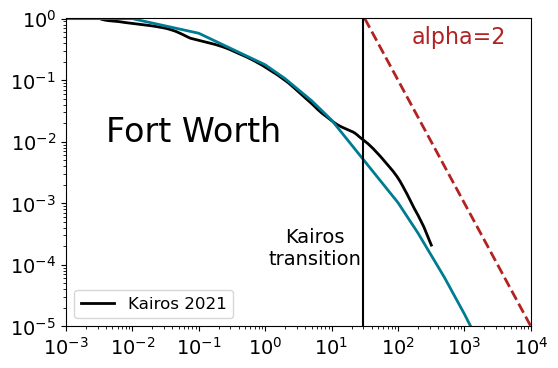

In [39]:
# Cumulative loglog emissions Fort Worth

ax = plt.gca()

# Loglog of full distribution
plt.loglog(KairosBarnett['Emission magnitude [kgh]'], 1 - KairosBarnett['Cumulative fraction of sites inc partial detect'] + KairosBarnett.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="solid")
BarnettLogNormal = scipy.stats.lognorm.fit(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfNMAll = scipy.stats.lognorm.cdf(x=xx, s=BarnettLogNormal[0], loc=BarnettLogNormal[1], scale=BarnettLogNormal[2])
plt.loglog(xx, 1 - lognormCdfNMAll, linewidth=2, color=colors[1])

# Power law approximation
plt.loglog([10**1.5, 10**4], [10**0, 10**-5],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-0.4, 'alpha=2', fontsize=16, color='firebrick', rotation='horizontal')

plt.axvline(surveyStats.loc['Fort_Worth_2021', 'Transition point'], color=colors[0], linestyle='-', lw=1.5)
plt.text(10**0.75, 10**-4, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(10**-5, 1.01)
# ax.set_ylim(10**-1, 10**0)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 10**-2, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
# plt.savefig('Figures/Fort Worth distribution loglog 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth distribution loglog ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth distribution loglog ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
plt.show()

In [40]:
# Compute means of fitted lognormal distributions
# Do this nonparametrically, by taking the mean of 10 million random samples of these fitted lognormal distributions

sample_size = 10000000
# percentiles = [0.5]
lognormal_dist_stats = pd.DataFrame(scipy.stats.lognorm.rvs(s=KairosNMLogNormal[0], loc=KairosNMLogNormal[1], scale=KairosNMLogNormal[2], size=sample_size)).describe()
lognormal_dist_stats.columns = ['KairosPermian'] # Ensure proper column name for first entry
lognormal_dist_stats['CMPermian2019'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=CMPermian2019LogNormal[0], loc=CMPermian2019LogNormal[1], scale=CMPermian2019LogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMPermian2020'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=CMPermian2020LogNormal[0], loc=CMPermian2020LogNormal[1], scale=CMPermian2019LogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMPermian2021Summer'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=CMPermianS2021LogNormal[0], loc=CMPermianS2021LogNormal[1], scale=CMPermianS2021LogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMPermian2021Fall'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMCA2016'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=CA2016LogNormal[0], loc=CA2016LogNormal[1], scale=CA2020COVIDLogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMCA2017'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=CA2017LogNormal[0], loc=CA2017LogNormal[1], scale=CA2017LogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMCA2020COVID'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=CA2020COVIDLogNormal[0], loc=CA2020COVIDLogNormal[1], scale=CA2020COVIDLogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMCA2020'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=CAF2020LogNormal[0], loc=CAF2020LogNormal[1], scale=CAF2020LogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMCA2021'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=CA2021LogNormal[0], loc=CA2021LogNormal[1], scale=CA2021LogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMDJ2021Summer'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=DJSummerLogNormal[0], loc=DJSummerLogNormal[1], scale=DJSummerLogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMDJ2021Fall'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=DJFallLogNormal[0], loc=DJFallLogNormal[1], scale=DJFallLogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMAppalachia2021'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=PennsylvaniaLogNormal[0], loc=PennsylvaniaLogNormal[1], scale=PennsylvaniaLogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['CMUinta2020'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=UintaLogNormal[0], loc=UintaLogNormal[1], scale=UintaLogNormal[2], size=sample_size)).describe()
lognormal_dist_stats['KairosBarnett'] = pd.DataFrame(scipy.stats.lognorm.rvs(s=BarnettLogNormal[0], loc=BarnettLogNormal[1], scale=BarnettLogNormal[2], size=sample_size)).describe()

In [68]:
# Compute the mean of the 10 million samples of the fitted lognormal distribution for each campaign
# The first entry here is the Kairos Permian campaign
lognormal_dist_stats.loc[['mean'],:].transpose()

,mean
KairosPermian,3.345763
CMPermian2019,3.973209
CMPermian2020,5.433139
CMPermian2021Summer,7.582920
CMPermian2021Fall,7.484757
CMCA2016,0.531707
CMCA2017,0.510521
CMCA2020COVID,0.556346
CMCA2020,0.533727
CMCA2021,0.503916


In [69]:
# Compute the standard error of the mean of the 10 million samples of the  fitted lognormal
lognormal_dist_stats.loc[['std'],:]/np.sqrt(sample_size)

,KairosPermian,CMPermian2019,CMPermian2020,CMPermian2021Summer,CMPermian2021Fall,CMCA2016,CMCA2017,CMCA2020COVID,CMCA2020,CMCA2021,CMDJ2021Summer,CMDJ2021Fall,CMAppalachia2021,CMUinta2020,KairosBarnett
std,0.011005,0.019205,0.022419,0.032155,0.033548,0.00114,0.001066,0.001277,0.00109,0.001055,0.022207,0.042426,0.003627,0.008103,0.004067


In [70]:
# Lognormal parameters fitted for the Barnett (Fort Worth) data
BarnettLogNormal

(2.136319112694956, 0.009931129482142722, 0.13772346611692812)

In [41]:
# Function to convert an empirical CDF of emissions to an empirical PDF
# Uses spline smoothing
# Uses 100 knots by default

def ecdfToLogLogPDF (df, knot_numbers=100):
    # Source: https://www.datatechnotes.com/2021/11/scattered-data-spline-fitting-example.html
    knot_numbers = knot_numbers
    x = np.log(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = np.log(df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites'])
    x_new = np.linspace(0, 1, knot_numbers+2)[1:-1]
    q_knots = np.quantile(x, x_new)
    t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
    x_even_log_space = np.arange(-10, 6.1, 0.1)
    yfit_even = pd.DataFrame(interpolate.BSpline(t,c,k)(x_even_log_space)).diff()[0]
    return x_even_log_space, yfit_even

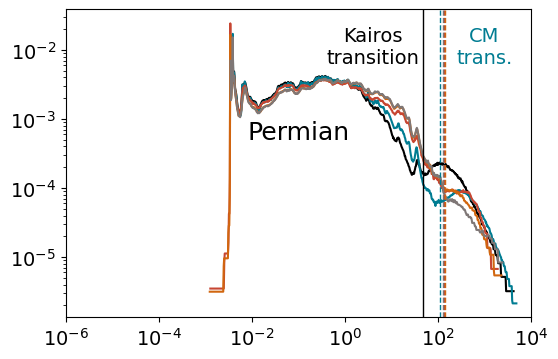

In [42]:
# Permian PDFs

selected_dfs = [kairosPermian, CMPermian2019, CMPermian2020, CMPermian2021Summer, CMPermian2021Fall]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    # Simulation-only PDFs
    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)

# Transition points
plt.axvline(surveyStats.loc['Kairos_Permian', 'Transition point'], color=colors[0], linestyle="-", lw=1)
plt.axvline(surveyStats.loc['Permian_2019', 'Transition point'], color=colors[1], linestyle="--", lw=1)
plt.axvline(surveyStats.loc['Permian_2020', 'Transition point'], color=colors[2], linestyle="--", lw=1)
plt.axvline(surveyStats.loc['Permian_fall2021', 'Transition point'], color=colors[3], linestyle="--", lw=1)
plt.axvline(surveyStats.loc['Permian_summer2021', 'Transition point'], color=colors[4], linestyle="--", lw=1)
plt.text(10**3, 10**-2.2, 'CM\ntrans.', size=14, color=colors[1], rotation=0, ha='center')
plt.text(10**0.6, 10**-2.2, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-3.3, 'Permian', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('Figures/Permian PDF 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Permian PDF ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Permian PDF ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

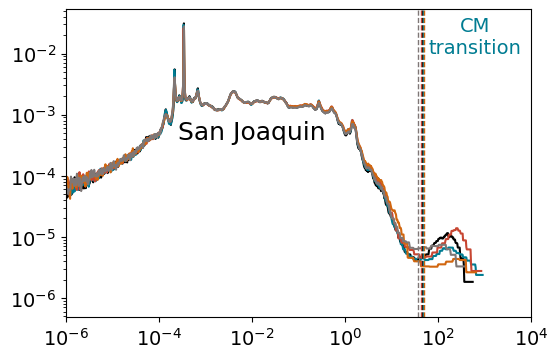

In [43]:
# CA PDFs
selected_dfs = [CMCA2016, CMCA2017, CMCA2020COVID, CMCA2020, CMCA2021]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)


# Transition points
plt.axvline(surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], color=colors[0], linestyle="--", lw=1)
plt.axvline(surveyStats.loc['San_Joaquin_2016', 'Transition point'], color=colors[1], linestyle='--', lw=1)
plt.axvline(surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], color=colors[2], linestyle='--', lw=1)
plt.axvline(surveyStats.loc['San_Joaquin_2017', 'Transition point'], color=colors[3], linestyle='--', lw=1)
plt.axvline(surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], color=colors[4], linestyle="--", lw=1)
plt.text(10**2.8, 10**-2, 'CM\ntransition', size=14, color=colors[1], rotation=0, ha='center')

plt.text(10**-2, 10**-3.4, 'San Joaquin', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('Figures/San Joaquin PDF 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin PDF ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/San Joaquin PDF ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
plt.show()

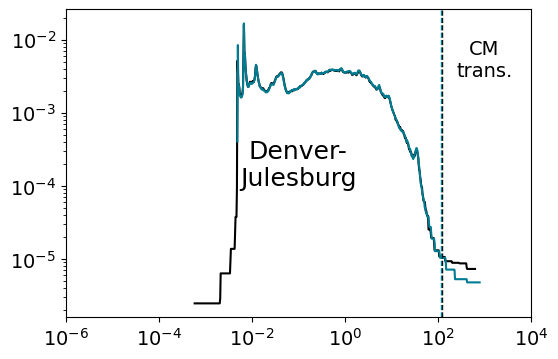

In [44]:
# DJ PDFs
selected_dfs = [CMDJ2021Summer, CMDJ2021Fall]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)

# Transition points
plt.axvline(surveyStats.loc['Denver_summer2021', 'Transition point'], color=colors[0], linestyle='--', lw=1)
plt.axvline(surveyStats.loc['Denver_fall2021', 'Transition point'], color=colors[1], linestyle='--', lw=1)
plt.text(10**3, 10**-2.5, 'CM\ntrans.', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-4, 'Denver-\nJulesburg', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('Figures/Denver-Julesburg PDF 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Denver-Julesburg PDF ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Denver-Julesburg PDF ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

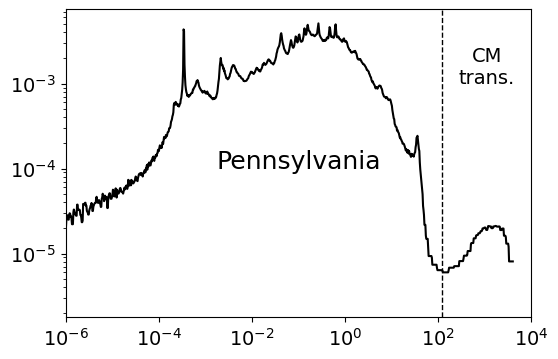

In [45]:
# Pennsylvania PDFs

selected_dfs = [CMAppalachia2021]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)


# Transition points
plt.axvline(surveyStats.loc['Pennsylvania_2021', 'Transition point'], color=colors[0], linestyle='--', lw=1)
plt.text(10**3.05, 10**-3, 'CM\ntrans.', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-4, 'Pennsylvania', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('Figures/Pennsylvania PDF 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania PDF ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Pennsylvania PDF ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

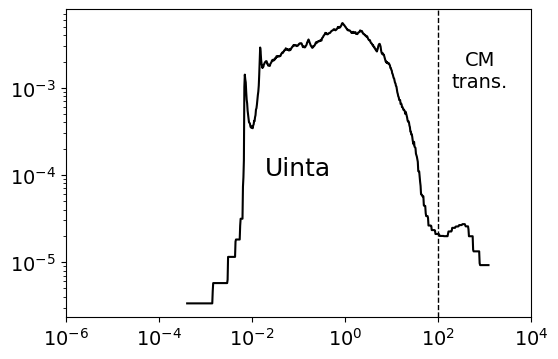

In [46]:
# Uinta PDFs

selected_dfs = [CMUinta2020]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)


# Transition points
plt.axvline(surveyStats.loc['Uinta_2020', 'Transition point'], color=colors[0], linestyle='--', lw=1)
plt.text(10**2.9, 10**-3, 'CM\ntrans.', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-4, 'Uinta', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('Figures/Uinta PDF 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta PDF ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Uinta PDF ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

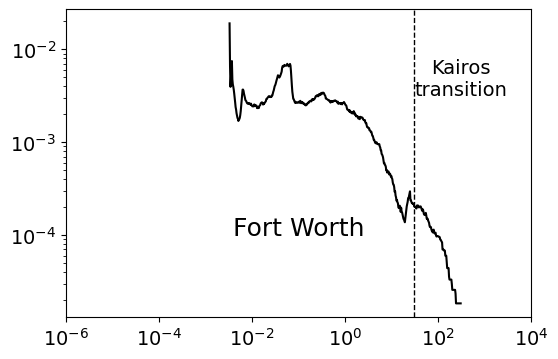

In [47]:
# Fort Worth PDFs

selected_dfs = [KairosBarnett]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)


# Transition points
plt.axvline(surveyStats.loc['Fort_Worth_2021', 'Transition point'], color=colors[0], linestyle='--', lw=1)
plt.text(10**2.5, 10**-2.5, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-4, 'Fort Worth', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14) #np.random.uniform(size=10)
plt.yticks(fontsize=14)
# plt.savefig('Figures/Fort Worth PDF 20230824.pdf', format='pdf', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth PDF ' + todaydate + '.png'), format='png', bbox_inches="tight")
plt.savefig(pathlib.PurePath(base_dir,'Figures/Fort Worth PDF ' + todaydate + '.pdf'), format='pdf', bbox_inches="tight")
# plt.show()

TROPOMI distribution

# Requires additional data that cannot be shared in the repository (details to request the dataset below)
# As a result, this cell has been changed to Markdown in the published version to enable smooth Run All commands


# Import TROPOMI-detected methane emissions from Lauvaux et al. 2022
# These emissions were detected by Kayrros
# https://www.science.org/doi/10.1126/science.abj4351

### NOTE: The authors of the Lauvaux et al. study have exclusive rights to redistribute these underlying data
### To request these data, visit https://www.methanewatch.kayrros.com/

Kayrros_plumes = pd.read_excel(pathlib.PurePath('Other input data', 'S5P_ultra_emitters_2019_2020.xls'), sheet_name="S5P_ultra_emitters_2019_2020")
Kayrros_plumes = Kayrros_plumes[Kayrros_plumes['category']=='og']

# Kayrros data prep
Kayrros_plumes_only = Kayrros_plumes['emissions_rate_tons_hour']*1000
Kayrros_plumes_pos = Kayrros_plumes_only[Kayrros_plumes_only > 0] #(Omara_plumes_only > 0.1) & (Omara_plumes_only < 20)]
Kayrros_num_plumes = Kayrros_plumes_pos.size
np.max(Kayrros_num_plumes)

# Plot emissions from Lauvaux et al. on a loglog plot
# Alongside rough power law examples, approximating different parts of the curve
ax = plt.gca()
plt.loglog(Kayrros_plumes_pos.sort_values(ascending=False), np.arange(1, Kayrros_num_plumes + 1, 1)/Kayrros_num_plumes, linewidth=2, color="black")
ax.set_xlim(10**3, 10**7)
plt.loglog([10**5.1, 10**6.1], [10**-0, 10**-4.5],color='firebrick',
         linestyle='dashed',linewidth=2)
plt.loglog([10**4.75, 10**5.75], [10**-0, 10**-2.4],color='saddlebrown',
         linestyle='dashed',linewidth=2)
ax.text(10**5.75, 10**-2.3, 'alpha=2.4', fontsize=16, color='saddlebrown', rotation='horizontal')
ax.text(10**5.9, 10**-3, 'alpha=4.5', fontsize=16, color='firebrick', rotation='horizontal')
ax.set_xlabel('Emission magnitude \n [kgh(CH$_4$)]', fontsize=18)
ax.set_ylabel('Cumulative fraction of sites \n (largest to smallest)', fontsize=18)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.legend(['Lauvaux et al. global'],
           loc='lower left', fontsize=12)

# plt.savefig('Figures/Kayrros loglog 20230816.pdf', format='pdf')
plt.show()

Irakulis-Loitxate et al. 2021 distribution

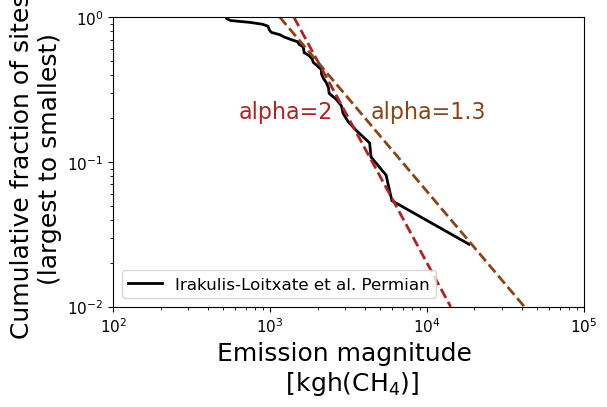

In [48]:
# Source: Irakulis-Loitxate et al. 2021
# https://www.science.org/doi/10.1126/sciadv.abf4507
IL2021_plumes = pd.read_excel(pathlib.PurePath(base_dir, 'Other input data', 'Irakulis data 20211229.xlsx'), sheet_name="Sheet1")

# Irakulis-Loitxate et al. data prep
IL2021_plumes_only = IL2021_plumes['Emission rate'] # kg/hr
IL2021_plumes_pos = IL2021_plumes_only[IL2021_plumes_only > 0] #(Omara_plumes_only > 0.1) & (Omara_plumes_only < 20)]
IL2021_num_plumes = IL2021_plumes_pos.size
np.max(IL2021_num_plumes)

# Plot emissions from Irakulis-Loitxate et al. on a loglog plot
# Alongside rough power law examples, approximating different parts of the curve
ax = plt.gca()
plt.loglog(IL2021_plumes_pos.sort_values(ascending=False), np.arange(1, IL2021_num_plumes + 1, 1)/IL2021_num_plumes, linewidth=2, color="black")
ax.set_xlim(10**2, 10**5)
ax.set_ylim(10**-2, 10**0)
plt.loglog([10**3.15, 10**4.15], [10**0, 10**-2],color='firebrick',
         linestyle='dashed',linewidth=2)
plt.loglog([10**3.06, 10**4.62], [10**-0, 10**-2],color='saddlebrown',
         linestyle='dashed',linewidth=2)
ax.text(10**2.8, 10**-0.7, 'alpha=2', fontsize=16, color='firebrick', rotation='horizontal')
ax.text(10**3.64, 10**-0.7, 'alpha=1.3', fontsize=16, color='saddlebrown', rotation='horizontal')
ax.set_xlabel('Emission magnitude \n [kgh(CH$_4$)]', fontsize=18)
ax.set_ylabel('Cumulative fraction of sites \n (largest to smallest)', fontsize=18)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.legend(['Irakulis-Loitxate et al. Permian'],
           loc='lower left', fontsize=12)

# plt.savefig('Figures/Irakulis-Loitxate Permian loglog 20230816.pdf', format='pdf')
plt.show()

In [49]:
# Find total aerially measured well site (production) emissions for all campaigns
kg_per_t = 1000
pd.DataFrame([kairosPermian['Cumulative aerial emissions [kgh]'].max(),
CMPermian2019['Cumulative aerial emissions [kgh]'].max(),
CMPermian2020['Cumulative aerial emissions [kgh]'].max(),
CMPermian2021Summer['Cumulative aerial emissions [kgh]'].max(),
CMPermian2021Fall['Cumulative aerial emissions [kgh]'].max(),
CMCA2016['Cumulative aerial emissions [kgh]'].max(),
CMCA2017['Cumulative aerial emissions [kgh]'].max(),
CMCA2020COVID['Cumulative aerial emissions [kgh]'].max(),
CMCA2020['Cumulative aerial emissions [kgh]'].max(),
CMCA2021['Cumulative aerial emissions [kgh]'].max(),
CMDJ2021Summer['Cumulative aerial emissions [kgh]'].max(),
CMDJ2021Fall['Cumulative aerial emissions [kgh]'].max(),
CMAppalachia2021['Cumulative aerial emissions [kgh]'].max(),
CMUinta2020['Cumulative aerial emissions [kgh]'].max(),
KairosBarnett['Cumulative aerial emissions [kgh]'].max()])/kg_per_t

,0
0,86.497743
1,182.554631
2,30.362723
3,29.925593
4,28.370458
5,3.781168
6,4.723274
7,4.104728
8,1.935847
9,1.564519


In [50]:
# Find total aerially measured midstream emissions for all campaigns
kg_per_t = 1000
pd.DataFrame([kairosPermianMidstream['Cumulative aerial emissions [kgh]'].max(),
CMPermian2019Midstream['Cumulative aerial emissions [kgh]'].max(),
CMPermian2020Midstream['Cumulative aerial emissions [kgh]'].max(),
CMPermian2021SummerMidstream['Cumulative aerial emissions [kgh]'].max(),
CMPermian2021FallMidstream['Cumulative aerial emissions [kgh]'].max(),
CMCA2016Midstream['Cumulative aerial emissions [kgh]'].max(),
CMCA2017Midstream['Cumulative aerial emissions [kgh]'].max(),
CMCA2020COVIDMidstream['Cumulative aerial emissions [kgh]'].max(),
CMCA2020Midstream['Cumulative aerial emissions [kgh]'].max(),
CMCA2021Midstream['Cumulative aerial emissions [kgh]'].max(),
CMDJ2021SummerMidstream['Cumulative aerial emissions [kgh]'].max(),
CMDJ2021FallMidstream['Cumulative aerial emissions [kgh]'].max(),
CMAppalachia2021Midstream['Cumulative aerial emissions [kgh]'].max(),
CMUinta2020Midstream['Cumulative aerial emissions [kgh]'].max(),
KairosBarnettMidstream['Cumulative aerial emissions [kgh]'].max()])/kg_per_t

,0
0,66.381237
1,159.701130
2,48.348070
3,41.920897
4,36.576148
5,6.529550
6,7.914718
7,4.295510
8,3.222433
9,0.719724


# Analysis of UNFCCC National Inventory Reports
(converted to Markdown, source data can be found at

# Import GHGRP data from each Annex I country
Australia_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/aus-2022-crf-16sep22/AUS_2022_2020_16092022_061457.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Austria_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/aut-2022-crf-15apr22/AUT_2022_2020_13042022_000017.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Belgium_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/bel-2022-crf-23may22/BEL_2022_2020_14052022_165852.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Bulgaria_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/bgr-2022-crf-15apr22/BGR_2022_2020_15042022_142728.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Belarus_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/blr-2022-crf-26may22/BLR_2022_2020_25052022_130250.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Canada_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/can-2022-crf-14apr22/CAN_2022_2020_27032022_221210.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Switzerland_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/che-2022-crf-14apr22/CHE_2022_2020_07042022_102546.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Cyprus_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/cyp-2022-crf-9sep22/CYP_2022_2020_09092022_121715.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Czech_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/cze-2022-crf-14apr22/CZE_2022_2020_14042022_071330.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Germany_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/deu-2022-crf-8apr22/DEU_2022_2020_07042022_151420.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Denmark_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/dnk-2022-crf-15apr22/DNK_2022_2020_06042022_140625.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Spain_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/esp-2022-crf-12apr22/ESP_2022_2020_11042022_181156.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Estonia_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/est-2022-crf-17sep22/EST_2022_2020_16092022_212323.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
EuroUnion_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/eua-2022-crf-26may22/EUA_2022_2020_26052022_154529.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Finland_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/fin-2022-crf-14apr22/FIN_2022_2020_13042022_210004.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
France_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/fra-2022-crf-12apr22/FRA_2022_2020_11032022_224118.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
GreatBritain_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/gbr-2022-crf-11may22/GBR_2022_2020_10052022_142545.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Greece_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/grc-2022-crf-9sep22/GRC_2022_2020_08092022_232208.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Croatia_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/hrv-2022-crf-14oct22/HRV_2022_2020_14102022_091514.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Hungary_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/hun-2022-crf-27may22/HUN_2022_2020_27052022_013655.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Ireland_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/irl-2022-crf-7sep22/IRL_2022_2020_06092022_170558.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Iceland_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/isl-2022-crf-23sep22/ISL_2022_2020_23092022_115050.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Italy_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/ita-2022-crf-8apr22/ITA_2022_2020_06042022_224226.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Japan_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/jpn-2022-crf-15apr22/JPN_2022_2020_14042022_024155.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Kazakhstan_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/kaz-2022-crf-15apr22/KAZ_2022_2020_14042022_233108.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Liechtenstein_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/lie-2022-crf-9nov22/LIE_2022_2020_09112022_100823.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Lithuania_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/ltu-2022-crf-25may22/LTU_2022_2020_25052022_034340.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Luxembourg_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/lux-2022-crf-27oct22/LUX_2022_2020_26102022_192128.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Latvia_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/lva-2022-crf-14apr22/LVA_2022_2020_11042022_102027.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Monaco_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/mco-2022-crf-11apr22/MCO_2022_2020_11042022_111644.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Malta_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/mlt-2022-crf-16sep22/MLT_2022_2020_16092022_221826.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Netherlands_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/nld-2022-crf-14apr22/NLD_2022_2020_14042022_060251.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Norway_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/nor-2022-crf-16sep22/NOR_2022_2020_16092022_111849.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
NewZealand_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/nzl-2022-crf-14apr22/NZL_2022_2020_13042022_072533.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Poland_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/pol-2022-crf-21oct22/POL_2022_2020_21102022_115523.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Portugal_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/prt-2022-crf-24oct22/PRT_2022_2020_21102022_224927.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Romania_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/rou-2022-crf-2nov22/ROU_2022_2020_19102022_160047.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Russia_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/rus-2022-crf-15apr22/RUS_2022_2020_13042022_120320.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Slovakia_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/svk-2022-crf-20oct22/SVK_2022_2020_20102022_193051.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Slovenia_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/svn-2022-crf-14oct22/SVN_2022_2020_14102022_053414.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Sweden_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/swe-2022-crf-12apr22/SWE_2022_2020_08042022_154745.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Turkey_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/tur-2022-crf-14apr22/TUR_2022_2020_14042022_045644.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
Ukraine_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/ukr-2022-crf-13may22/UKR_2022_2020_13052022_120154.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)
USA_NIR = pd.read_excel('/Backupworthy/Summer 2020/Kairos/Emissions distribution/UNFCCC reports/usa-2022-crf-15apr22/USA_2022_2020_15042022_061329.xlsx', sheet_name="Summary3s1", engine = 'openpyxl', skiprows=4)

# Extract GHGRP-reported oil and gas methane emissions data source from each Annex I country
UNFCCC_OG_CH4_sources = pd.DataFrame({"Australia":Australia_NIR.loc[10, ["CH4", "Unnamed: 4"]]})
UNFCCC_OG_CH4_sources["Austria"] = Austria_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Belgium"] = Belgium_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Bulgaria"] = Bulgaria_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Belarus"] = Belarus_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Canada"] = Canada_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Switzerland"] = Switzerland_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Cyprus"] = Cyprus_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Czech"] = Czech_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Germany"] = Germany_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Denmark"] = Denmark_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Spain"] = Spain_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Estonia"] = Estonia_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["EuroUnion"] = EuroUnion_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Finland"] = Finland_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["France"] = France_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["GreatBritain"] = GreatBritain_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Greece"] = Greece_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Croatia"] = Croatia_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Hungary"] = Hungary_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Ireland"] = Ireland_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Iceland"] = Iceland_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Italy"] = Italy_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Japan"] = Japan_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Kazakhstan"] = Kazakhstan_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Liechtenstein"] = Liechtenstein_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Lithuania"] = Lithuania_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Luxembourg"] = Luxembourg_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Latvia"] = Latvia_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Monaco"] = Monaco_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Malta"] = Malta_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Netherlands"] = Netherlands_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Norway"] = Norway_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["NewZealand"] = NewZealand_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Poland"] = Poland_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Portugal"] = Portugal_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Romania"] = Romania_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Russia"] = Russia_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Slovakia"] = Slovakia_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Slovenia"] = Slovenia_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Sweden"] = Sweden_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Turkey"] = Turkey_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["Ukraine"] = Ukraine_NIR.loc[10, ["CH4", "Unnamed: 4"]]
UNFCCC_OG_CH4_sources["USA_NIR"] = USA_NIR.loc[10, ["CH4", "Unnamed: 4"]]

# Merge into a single data frame
UNFCCC_OG_CH4_sources_DF = pd.DataFrame(UNFCCC_OG_CH4_sources.transpose())
UNFCCC_OG_CH4_sources_DF.columns = ["Tier", "Data source"]
UNFCCC_OG_CH4_sources_DF

# Key summary statistics of methane emission data sources for GHGRP Annex I countries
Annex1CountriesUsingDefault = np.sum(UNFCCC_OG_CH4_sources_DF["Data source"].str.contains("D"))
Annex1CountriesOnlyDefault = np.sum(UNFCCC_OG_CH4_sources_DF["Data source"] == "D")
Annex1CountriesUsingTier1 = np.sum(UNFCCC_OG_CH4_sources_DF["Tier"].str.contains("T1"))
Annex1CountriesOnlyTier1 = np.sum(UNFCCC_OG_CH4_sources_DF["Tier"] == "T1")

NonNullAnnex1Countries = np.sum(UNFCCC_OG_CH4_sources_DF["Data source"].isnull() == False)

# Fraction countries using default emission factors, fraction using only default emission factors, fraction using Tier 1 method, fraction using only Tier 1 method
Annex1CountriesUsingDefault/NonNullAnnex1Countries, Annex1CountriesOnlyDefault/NonNullAnnex1Countries, Annex1CountriesUsingTier1/NonNullAnnex1Countries, Annex1CountriesOnlyTier1/NonNullAnnex1Countries

Save 100,000 samples from each distribution

In [87]:
campaign_names = ["Kairos_Permian", "Permian_2019", "Permian_2020", "Permian_summer2021", "Permian_fall2021",
                  "San_Joaquin_2016", "San_Joaquin_2017", "San_Joaquin_summer2020", "San_Joaquin_fall2020",
                  "San_Joaquin_fall2021", "Denver_summer2021", "Denver_fall2021", "Pennsylvania_2021",
                  "Uinta_2020", "Fort_Worth_2021"]

number_samples_to_save = 100000

zero_init = np.zeros(shape=(number_samples_to_save,len(campaign_names)))
random_sample_all_campaigns = pd.DataFrame(zero_init, columns=campaign_names)

In [88]:
# Generate random samples of for each Carbon Mapper campaign
# No need to account for partial detection

random_sample_all_campaigns["Permian_2019"] = CMPermian2019['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["Permian_2020"] = CMPermian2020['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["Permian_summer2021"] = CMPermian2021Summer['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["Permian_fall2021"] = CMPermian2021Fall['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["San_Joaquin_2016"] = CMCA2016['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["San_Joaquin_2017"] = CMCA2017['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["San_Joaquin_summer2020"] = CMCA2020COVID['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["San_Joaquin_fall2020"] = CMCA2020['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["San_Joaquin_fall2021"] = CMCA2021['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["Denver_summer2021"] = CMDJ2021Summer['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["Denver_fall2021"] = CMDJ2021Fall['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["Pennsylvania_2021"] = CMAppalachia2021['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns["Uinta_2020"] = CMUinta2020['Emission magnitude [kgh]'].sample(number_samples_to_save, replace=True, ignore_index=True)
random_sample_all_campaigns.head()


,Kairos_Permian,Permian_2019,Permian_2020,Permian_summer2021,Permian_fall2021,San_Joaquin_2016,San_Joaquin_2017,San_Joaquin_summer2020,San_Joaquin_fall2020,San_Joaquin_fall2021,Denver_summer2021,Denver_fall2021,Pennsylvania_2021,Uinta_2020,Fort_Worth_2021
0,0.0,0.362308,0.616098,0.010434,0.912894,0.019004,0.008063,0.000000,0.000000,0.000000,0.471518,9.436594,2.197869,0.032566,0.0
1,0.0,1.070763,2.200743,0.083998,0.787257,0.002577,0.000664,0.000000,0.000000,0.000742,0.005007,0.042421,0.002521,73.551211,0.0
2,0.0,0.003448,2.136889,3.603151,0.592455,0.000000,0.171233,0.000354,0.000110,0.000004,1.087792,0.165603,0.958263,0.182788,0.0
3,0.0,2.406449,0.074090,0.915672,0.172402,0.000275,0.008392,0.000000,0.002439,0.000485,1.754002,0.004992,0.064832,0.185041,0.0
4,0.0,0.003940,0.017926,0.004045,8.164177,0.000033,0.000000,0.012844,1.594600,0.002713,0.703916,0.040644,0.567425,0.039100,0.0


In [89]:
# Generate random sample for Kairos Fort Worth/Barnett campaign
# Accounting for partial detection (increased probability of drawing sites in the partial detection range when compared with observed incidence)

siteCountBarnett = np.round((1 + KairosBarnett['Partial detection correction [%]'])*1000)
# siteCount = 1000 # np.round((1 + KairosBarnett['Partial detection correction [%]'] - KairosBarnett['Partial detection correction [%]'])*1000)
siteList = np.array([])
for jj in KairosBarnett.index:
    siteList = np.append(siteList, np.repeat(jj, siteCountBarnett[jj]))

random_sample_all_campaigns["Fort_Worth_2021"] = KairosBarnett.loc[(pd.DataFrame(siteList).sample(number_samples_to_save, replace=True, ignore_index=True)).iloc[:,0], 'Emission magnitude [kgh]'].reset_index(drop=True)
# KairosBarnett.loc[(pd.DataFrame(siteList).sample(number_samples_to_save, replace=True, ignore_index=True)).iloc[:,0], 'Emission magnitude [kgh]'].iloc[:, 0]

In [90]:
# Generate random sample for Kairos Permian campaign, accounting for partial detection
# Accounting for partial detection (increased probability of drawing sites in the partial detection range when compared with observed incidence)

siteCountKairosPermian = np.round((1 + kairosPermian['Partial detection correction [%]'])*1000)
# siteCount = 1000 # np.round((1 + KairosBarnett['Partial detection correction [%]'] - KairosBarnett['Partial detection correction [%]'])*1000)
siteList = np.array([])
for jj in kairosPermian.index:
    siteList = np.append(siteList, np.repeat(jj, siteCountKairosPermian[jj]))

random_sample_all_campaigns["Kairos_Permian"] = kairosPermian.loc[(pd.DataFrame(siteList).sample(number_samples_to_save, replace=True)).iloc[:,0], 'Emission magnitude [kgh]'].reset_index(drop=True)

In [91]:
# Compute summary statistics for each random sample
random_sample_all_campaigns.describe()

,Kairos_Permian,Permian_2019,Permian_2020,Permian_summer2021,Permian_fall2021,San_Joaquin_2016,San_Joaquin_2017,San_Joaquin_summer2020,San_Joaquin_fall2020,San_Joaquin_fall2021,Denver_summer2021,Denver_fall2021,Pennsylvania_2021,Uinta_2020,Fort_Worth_2021
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6.530728,6.000247,5.777024,5.632977,5.708195,0.229082,0.298523,0.334540,0.204065,0.191546,1.969310,1.908872,3.701978,2.964391,1.591209
std,67.211084,73.147200,46.953054,45.172858,52.683228,5.616778,10.150935,9.807964,5.729543,4.117789,11.424171,10.331240,77.486938,26.097223,10.044247
min,0.003448,0.003448,0.001276,0.001241,0.003448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000587,0.004878,0.000000,0.000405,0.003311
25%,0.033609,0.037531,0.038002,0.051513,0.053181,0.000000,0.000000,0.000000,0.000000,0.000000,0.036306,0.037643,0.012500,0.123685,0.022163
50%,0.205483,0.241935,0.266405,0.376121,0.390371,0.000625,0.000665,0.000687,0.000689,0.000610,0.296149,0.316310,0.133038,0.604393,0.068851
75%,0.935388,1.147374,1.497652,2.032670,2.086250,0.020965,0.023375,0.024377,0.024527,0.020385,1.434067,1.491958,0.606794,2.073270,0.471540
max,4355.226792,5099.196780,2005.950811,2409.495502,2552.172660,582.337027,945.950829,876.171907,691.184469,375.386540,646.557790,825.069807,4220.430370,1261.361525,316.788306


In [92]:
# Save random samples for all campaigns to a CSV file
random_sample_all_campaigns.to_csv(pathlib.PurePath('100k random samples', '100k saved random samples from each distribution.csv'), index=False)
